In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import random
import datetime
import plotly.graph_objs as go
from plotly.offline import iplot

In [58]:
circuits = pd.read_csv('circuits.csv')
constructor_results = pd.read_csv('constructor_results.csv')
constructors_standings = pd.read_csv('constructor_standings.csv')
constructors = pd.read_csv('constructors.csv')
drivers_standings = pd.read_csv('driver_standings.csv')
drivers = pd.read_csv('drivers.csv')
lap_times = pd.read_csv('lap_times.csv')
pit_stops = pd.read_csv('pit_stops.csv')
qualifying = pd.read_csv('qualifying.csv')
races = pd.read_csv('races.csv')
results = pd.read_csv('results.csv')
seasons = pd.read_csv('seasons.csv')
status = pd.read_csv('status.csv')

In [59]:
def getMiliSeconds(time):
    try:
        if '.' in time:
            x = datetime.datetime.strptime(time,'%M:%S.%f')
        elif ',' in time:
            x = datetime.datetime.strptime(time,'%M:%S,%f')
        else:
            x = datetime.datetime.strptime(time,'%M:%S:%f')
        return datetime.timedelta(minutes=x.minute,seconds=x.second, microseconds = x.microsecond).total_seconds()
    except:
        x = datetime.datetime.strptime(str(time).split('.')[0],'%M:%S:%f')
        return datetime.timedelta(minutes=x.minute,seconds=x.second, microseconds = x.microsecond).total_seconds()

results['fastestLapTime'] = results['fastestLapTime'].replace('0','00:00.0')
qualifying['q1'] = qualifying['q1'].replace('0','00:00.0')
qualifying['q2'] = qualifying['q2'].replace('0','00:00.0')
qualifying['q3'] = qualifying['q3'].replace('0','00:00.0')

qualifying['q1'] = qualifying['q1'].apply(lambda x: getMiliSeconds(x))
qualifying['q2'] = qualifying['q2'].apply(lambda x: getMiliSeconds(x))
qualifying['q3'] = qualifying['q3'].apply(lambda x: getMiliSeconds(x))
lap_times['time'] = lap_times['time'].apply(lambda x: getMiliSeconds(x))
results['fastestLapTime'] = results['fastestLapTime'].apply(lambda x: getMiliSeconds(x))

drivers['fullName'] = drivers['forename'] +" "+ drivers['surname']



In [60]:
data = pd.merge(results, qualifying, on=['raceId', 'driverId','constructorId'], how='left')
pd.set_option('display.max_columns', 500)
data.head()

resultId  raceId  driverId  constructorId  number_x  grid  position_x  \
0         1      18         1              1        22     1           1   
1         2      18         2              2         3     5           2   
2         3      18         3              3         7     7           3   
3         4      18         4              4         5    11           4   
4         5      18         5              1        23     3           5   

  positionText  positionOrder  points  laps     time  milliseconds  \
0            1              1    10.0    58  34:50.6       5690616   
1            2              2     8.0    58    5.478       5696094   
2            3              3     6.0    58    8.163       5698779   
3            4              4     5.0    58   17.181       5707797   
4            5              5     4.0    58   18.014       5708630   

   fastestLap  rank  fastestLapTime  fastestLapSpeed  statusId  qualifyId  \
0          39     2            87.5          218.300         1        1.0   
1          41     3            87.7          217.586         1        5.0   
2          41     5            88.1          216.719         1        7.0   
3          58     7            88.6          215.464         1       12.0   
4          43     1            87.4          218.385         1        3.0   

   number_y  position_y    q1    q2    q3  
0      22.0         1.0  86.6  85.2  86.7  
1       3.0         5.0  86.0  85.5  87.2  
2       7.0         7.0  86.3  86.1  88.7  
3       5.0        12.0  86.9  86.2   0.0  
4      23.0         3.0  85.7  85.5  87.1

In [61]:
data = pd.merge(data, races, on='raceId', how='left')
data.head()

resultId  raceId  driverId  constructorId  number_x  grid  position_x  \
0         1      18         1              1        22     1           1   
1         2      18         2              2         3     5           2   
2         3      18         3              3         7     7           3   
3         4      18         4              4         5    11           4   
4         5      18         5              1        23     3           5   

  positionText  positionOrder  points  laps   time_x  milliseconds  \
0            1              1    10.0    58  34:50.6       5690616   
1            2              2     8.0    58    5.478       5696094   
2            3              3     6.0    58    8.163       5698779   
3            4              4     5.0    58   17.181       5707797   
4            5              5     4.0    58   18.014       5708630   

   fastestLap  rank  fastestLapTime  fastestLapSpeed  statusId  qualifyId  \
0          39     2            87.5          218.300         1        1.0   
1          41     3            87.7          217.586         1        5.0   
2          41     5            88.1          216.719         1        7.0   
3          58     7            88.6          215.464         1       12.0   
4          43     1            87.4          218.385         1        3.0   

   number_y  position_y    q1    q2    q3  year  round  circuitId  \
0      22.0         1.0  86.6  85.2  86.7  2008      1          1   
1       3.0         5.0  86.0  85.5  87.2  2008      1          1   
2       7.0         7.0  86.3  86.1  88.7  2008      1          1   
3       5.0        12.0  86.9  86.2   0.0  2008      1          1   
4      23.0         3.0  85.7  85.5  87.1  2008      1          1   

                    name        date    time_y  \
0  Australian Grand Prix  2008-03-16  04:30:00   
1  Australian Grand Prix  2008-03-16  04:30:00   
2  Australian Grand Prix  2008-03-16  04:30:00   
3  Australian Grand Prix  2008-03-16  04:30:00   
4  Australian Grand Prix  2008-03-16  04:30:00   

                                                 url  
0  http://en.wikipedia.org/wiki/2008_Australian_G...  
1  http://en.wikipedia.org/wiki/2008_Australian_G...  
2  http://en.wikipedia.org/wiki/2008_Australian_G...  
3  http://en.wikipedia.org/wiki/2008_Australian_G...  
4  http://en.wikipedia.org/wiki/2008_Australian_G...

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24900 entries, 0 to 24899
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         24900 non-null  int64  
 1   raceId           24900 non-null  int64  
 2   driverId         24900 non-null  int64  
 3   constructorId    24900 non-null  int64  
 4   number_x         24900 non-null  int64  
 5   grid             24900 non-null  int64  
 6   position_x       24900 non-null  int64  
 7   positionText     24900 non-null  object 
 8   positionOrder    24900 non-null  int64  
 9   points           24900 non-null  float64
 10  laps             24900 non-null  int64  
 11  time_x           24900 non-null  object 
 12  milliseconds     24900 non-null  int64  
 13  fastestLap       24900 non-null  int64  
 14  rank             24900 non-null  int64  
 15  fastestLapTime   24900 non-null  float64
 16  fastestLapSpeed  24900 non-null  float64
 17  statusId    

In [63]:
data = data.replace(np.nan, 0)

In [64]:
data1 = data.copy()
data1 = data1[data1['year']>2009]
data1.head()

resultId  raceId  driverId  constructorId  number_x  grid  position_x  \
20320     20323     337         4              6         8     3           1   
20321     20324     337        13              6         7     2           2   
20322     20325     337         1              1         2     4           3   
20323     20326     337        20              9         5     1           4   
20324     20327     337         3            131         4     5           5   

      positionText  positionOrder  points  laps   time_x  milliseconds  \
20320            1              1    25.0    49  39:20.4       5960396   
20321            2              2    18.0    49   16.099       5976495   
20322            3              3    15.0    49   23.182       5983578   
20323            4              4    12.0    49   38.799       5999195   
20324            5              5    10.0    49   40.213       6000609   

       fastestLap  rank  fastestLapTime  fastestLapSpeed  statusId  qualifyId  \
20320          45     1           118.3          191.706         1     3328.0   
20321          38     5           119.7          189.392         1     3327.0   
20322          42     4           119.6          189.665         1     3329.0   
20323          32    12           120.2          188.627         1     3326.0   
20324          45    13           120.2          188.599         1     3330.0   

       number_y  position_y     q1     q2     q3  year  round  circuitId  \
20320       8.0         3.0  114.6  114.2  114.6  2010      1          3   
20321       7.0         2.0  115.3  114.3  114.2  2010      1          3   
20322       2.0         4.0  115.3  114.7  115.2  2010      1          3   
20323       5.0         1.0  115.0  113.9  114.1  2010      1          3   
20324       4.0         5.0  115.5  114.7  115.2  2010      1          3   

                     name        date    time_y  \
20320  Bahrain Grand Prix  2010-03-14  12:00:00   
20321  Bahrain Grand Prix  2010-03-14  12:00:00   
20322  Bahrain Grand Prix  2010-03-14  12:00:00   
20323  Bahrain Grand Prix  2010-03-14  12:00:00   
20324  Bahrain Grand Prix  2010-03-14  12:00:00   

                                                     url  
20320  http://en.wikipedia.org/wiki/2010_Bahrain_Gran...  
20321  http://en.wikipedia.org/wiki/2010_Bahrain_Gran...  
20322  http://en.wikipedia.org/wiki/2010_Bahrain_Gran...  
20323  http://en.wikipedia.org/wiki/2010_Bahrain_Gran...  
20324  http://en.wikipedia.org/wiki/2010_Bahrain_Gran...

In [65]:
circuits.head()

circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng alt  \
0  Australia -37.84970  144.96800  10   
1   Malaysia   2.76083  101.73800  \N   
2    Bahrain  26.03250   50.51060  \N   
3      Spain  41.57000    2.26111  \N   
4     Turkey  40.95170   29.40500  \N   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4         http://en.wikipedia.org/wiki/Istanbul_Park

# Exploratory Data Analysis

Data analysis of the various race cuircuits, constructors and drivers

In [66]:
mpis = [{'lat': circuits['lat'],
  'lon': circuits['lng'],
  'marker': {'color': 'rgb(0,116,217)',
   'line': {'color': 'rgb(40,40,40)', 'width': 0.5},
   'size': 10,
   'sizemode': 'diameter'},
  'text': '0.387',
  'type': 'scattergeo'},
]


layout = go.Layout(
    title = 'Circuits World Location',
    showlegend = False,
    geo = dict(
            scope='world',
            projection=dict( type = 'natural earth'),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),)

fig =  go.Figure(layout=layout, data=mpis)
iplot( fig, validate=False)

In [67]:
races_count = data['name'].value_counts()
trace = go.Pie(labels=races_count.index, values=races_count.values, hole=0.6,textinfo= "none")
layout = go.Layout(
    title='Percentage of races by Location'
)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig, filename="plotting-library")

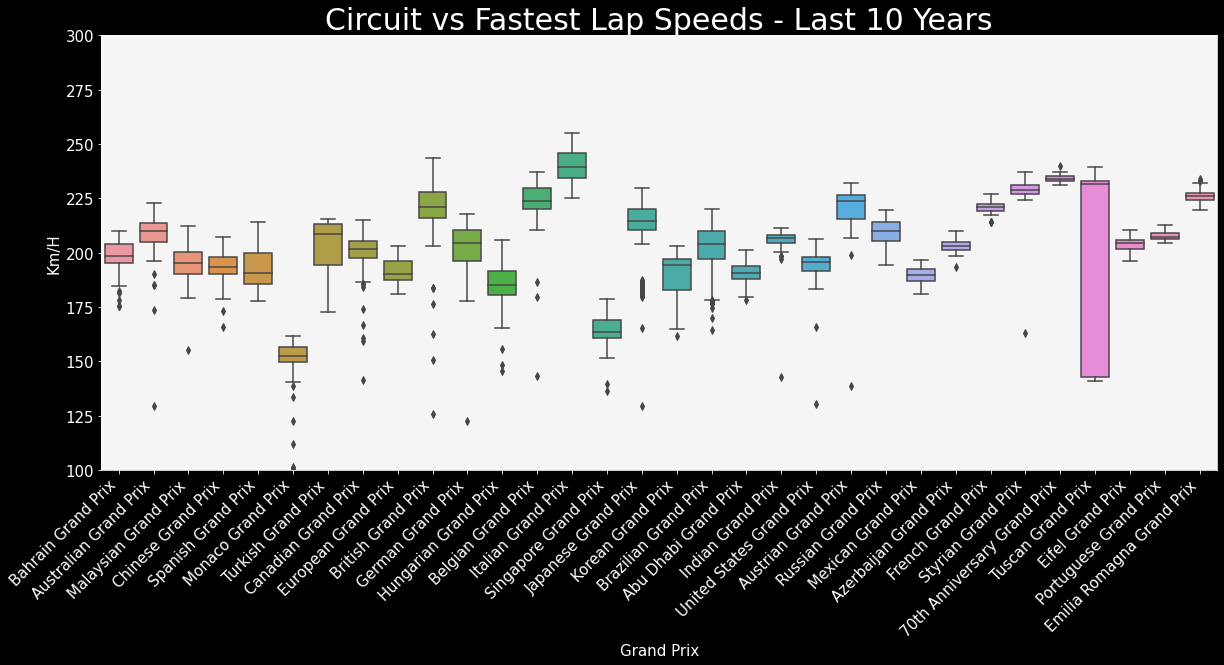

In [68]:
plt.style.use('dark_background')
fig, axs = plt.subplots(figsize=(20, 8))
axs.tick_params(axis="x", labelsize=15)
axs.tick_params(axis="y", labelsize=15)
axs.set_facecolor('whitesmoke')

sns.boxplot(x = 'name', y = 'fastestLapSpeed', data = data1)
plt.ylim(100,300)
plt.title("Circuit vs Fastest Lap Speeds - Last 10 Years",fontsize=30)
plt.xlabel('Grand Prix',fontsize = 15)
plt.ylabel('Km/H',fontsize = 15)
plt.xticks(rotation=45, ha='right')
plt.show()

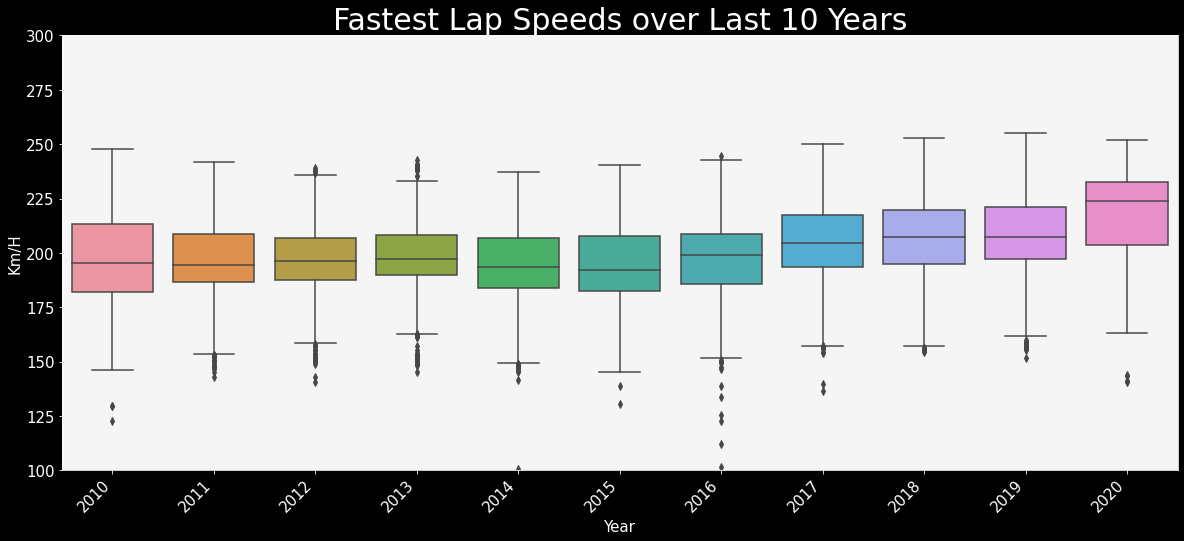

In [69]:
plt.style.use('dark_background')
fig, axs = plt.subplots(figsize=(20, 8))
axs.tick_params(axis="x", labelsize=15)
axs.tick_params(axis="y", labelsize=15)
axs.set_facecolor('whitesmoke')

sns.boxplot(x = 'year', y = 'fastestLapSpeed', data = data1)
plt.ylim(100,300)
plt.title("Fastest Lap Speeds over Last 10 Years",fontsize=30)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Km/H',fontsize = 15)
plt.xticks(rotation=45, ha='right')
plt.show()

We can see that the lap speeds have increased obviously over the last 10 years. However, we see that post 2014, the average speeds have risen faster per year post the 1.6 V6 Turbo Engine rule change. Could be due to the MGU-K and MGU-H introduction 

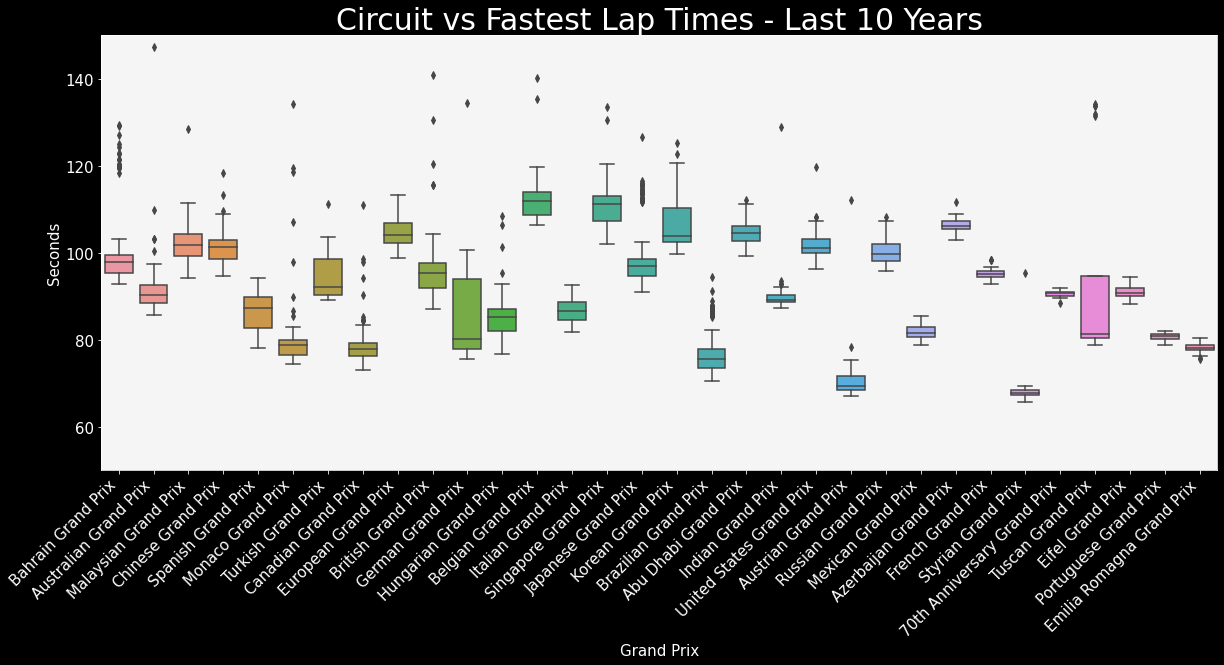

In [70]:
plt.style.use('dark_background')
fig, axs = plt.subplots(figsize=(20, 8))
axs.tick_params(axis="x", labelsize=15)
axs.tick_params(axis="y", labelsize=15)
axs.set_facecolor('whitesmoke')

sns.boxplot(x = 'name', y = 'fastestLapTime', data = data1)
plt.ylim(50,150)
plt.title("Circuit vs Fastest Lap Times - Last 10 Years",fontsize=30)
plt.xlabel('Grand Prix',fontsize = 15)
plt.ylabel('Seconds',fontsize = 15)
plt.xticks(rotation=45, ha='right')
plt.show()

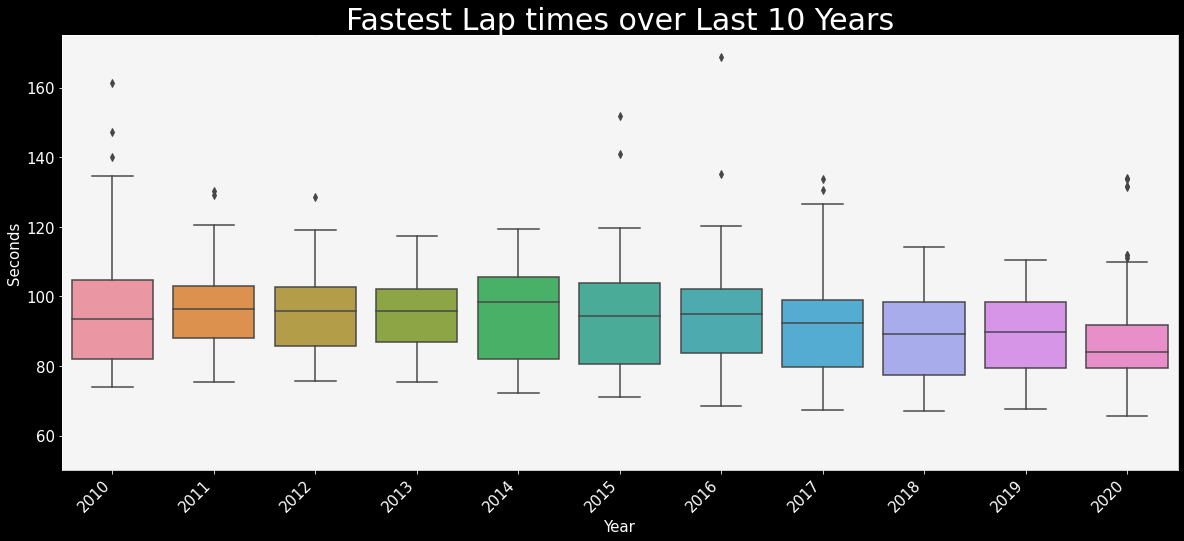

In [71]:
plt.style.use('dark_background')
fig, axs = plt.subplots(figsize=(20, 8))
axs.tick_params(axis="x", labelsize=15)
axs.tick_params(axis="y", labelsize=15)
axs.set_facecolor('whitesmoke')

sns.boxplot(x = 'year', y = 'fastestLapTime', data = data1)
plt.ylim(50,175)
plt.title("Fastest Lap times over Last 10 Years",fontsize=30)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Seconds',fontsize = 15)
plt.xticks(rotation=45, ha='right')
plt.show()

In [72]:
constructors_count = constructors['nationality'].value_counts()
trace = go.Pie(labels=constructors_count.index, values=constructors_count.values, hole=0.6,textinfo= "none")
layout = go.Layout(
    title='Percentage of Constructors by Nationality'
)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig, filename="plotting-library")

In [73]:
drivers_count = drivers['nationality'].value_counts()
trace = go.Pie(labels=drivers_count.index, values=drivers_count.values, hole=0.6,textinfo= "none")
layout = go.Layout(
    title='Percentage of Drivers by Nationality'
)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig, filename="plotting-library")

# Hamilton's Performance Analysis

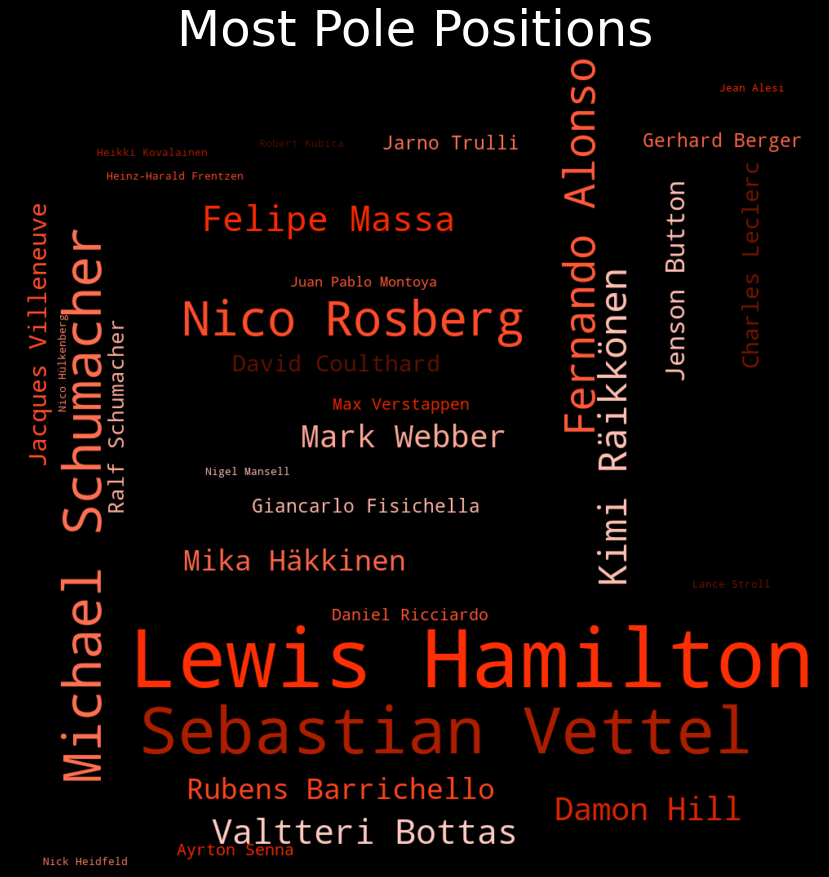

In [74]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(10, 100%%, %d%%)" % random.randint(15, 90)

q = pd.merge(qualifying,drivers,how='inner',on='driverId')
q = pd.merge(q,races,how='inner',on=['raceId'])
q = q.loc[q['position']==1]

array = list(q.loc[q['position']== 1]['fullName'].values)

word_could_dict=Counter(array)

wordcloud = WordCloud(width = 1000, height = 1000, max_font_size=100).generate_from_frequencies(word_could_dict)
default_colors = wordcloud.to_array()
plt.figure(figsize=(15,15))
plt.title("Most Pole Positions",fontsize=50)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.show()

In [75]:
results_drivers_merge = pd.merge(results, drivers, on='driverId', how='left')
results_drivers_merge.head()

resultId  raceId  driverId  constructorId  number_x  grid  position  \
0         1      18         1              1        22     1         1   
1         2      18         2              2         3     5         2   
2         3      18         3              3         7     7         3   
3         4      18         4              4         5    11         4   
4         5      18         5              1        23     3         5   

  positionText  positionOrder  points  laps     time  milliseconds  \
0            1              1    10.0    58  34:50.6       5690616   
1            2              2     8.0    58    5.478       5696094   
2            3              3     6.0    58    8.163       5698779   
3            4              4     5.0    58   17.181       5707797   
4            5              5     4.0    58   18.014       5708630   

   fastestLap  rank  fastestLapTime  fastestLapSpeed  statusId   driverRef  \
0          39     2            87.5          218.300         1    hamilton   
1          41     3            87.7          217.586         1    heidfeld   
2          41     5            88.1          216.719         1     rosberg   
3          58     7            88.6          215.464         1      alonso   
4          43     1            87.4          218.385         1  kovalainen   

  number_y code  forename     surname         dob nationality  \
0       44  HAM     Lewis    Hamilton  1985-01-07     British   
1       \N  HEI      Nick    Heidfeld  1977-05-10      German   
2        6  ROS      Nico     Rosberg  1985-06-27      German   
3       14  ALO  Fernando      Alonso  1981-07-29     Spanish   
4       \N  KOV    Heikki  Kovalainen  1981-10-19     Finnish   

                                              url           fullName  
0     http://en.wikipedia.org/wiki/Lewis_Hamilton     Lewis Hamilton  
1      http://en.wikipedia.org/wiki/Nick_Heidfeld      Nick Heidfeld  
2       http://en.wikipedia.org/wiki/Nico_Rosberg       Nico Rosberg  
3    http://en.wikipedia.org/wiki/Fernando_Alonso    Fernando Alonso  
4  http://en.wikipedia.org/wiki/Heikki_Kovalainen  Heikki Kovalainen

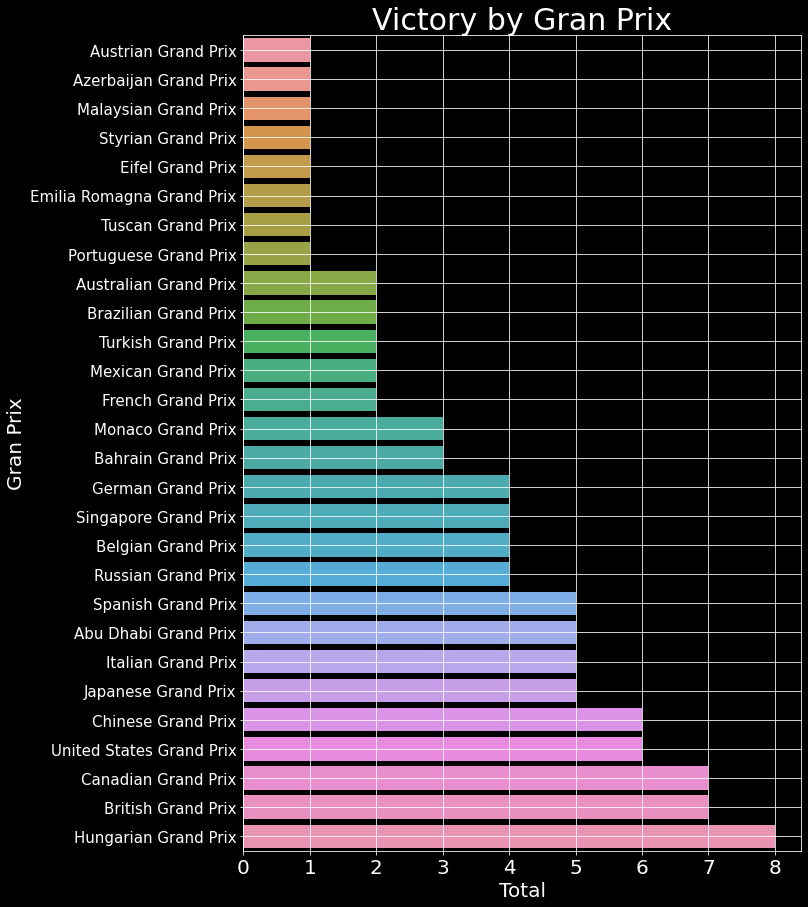

In [76]:
gb = pd.merge(results_drivers_merge.loc[results_drivers_merge['driverId'] == 1],races, on='raceId',how='inner')
gb = gb.loc[gb['positionOrder']==1].groupby('name')['driverId'].count().sort_values()

f,ax = plt.subplots(figsize =(10,15))
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=15)

sns.barplot(list(gb.values), list(gb.index))
ax.set_facecolor('k')
ax.patch.set_alpha(0.9)
plt.title("Victory by Gran Prix",fontsize=30)
plt.ylabel('Gran Prix',fontsize = 20)
plt.xlabel('Total',fontsize = 20,)
plt.grid()
plt.show()

Interestingly HAM has won more Hungarian GPs than on homeground at Silverstone (British GP)

Let's see how he performs compared to some other legends

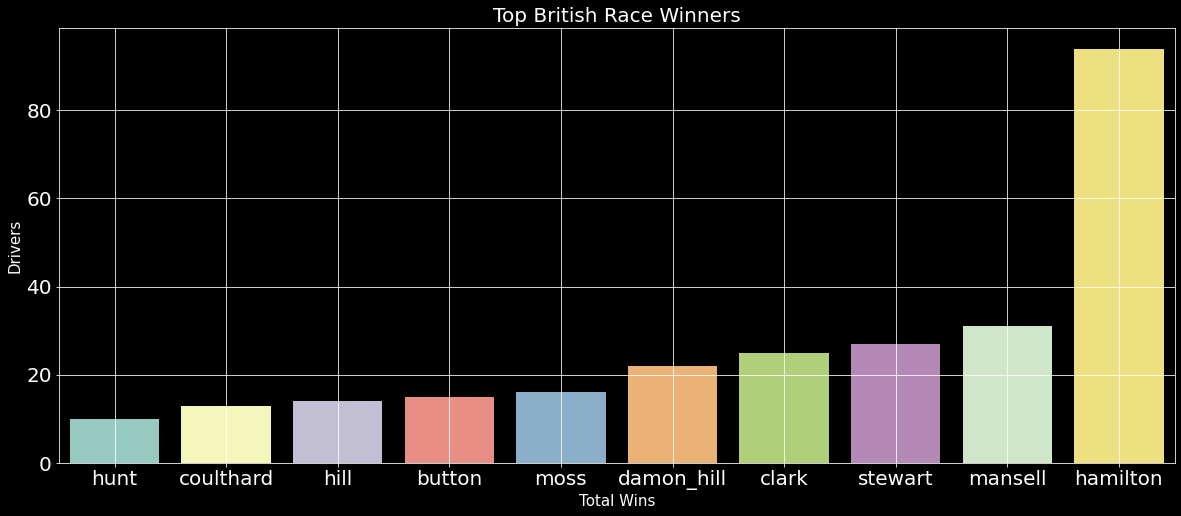

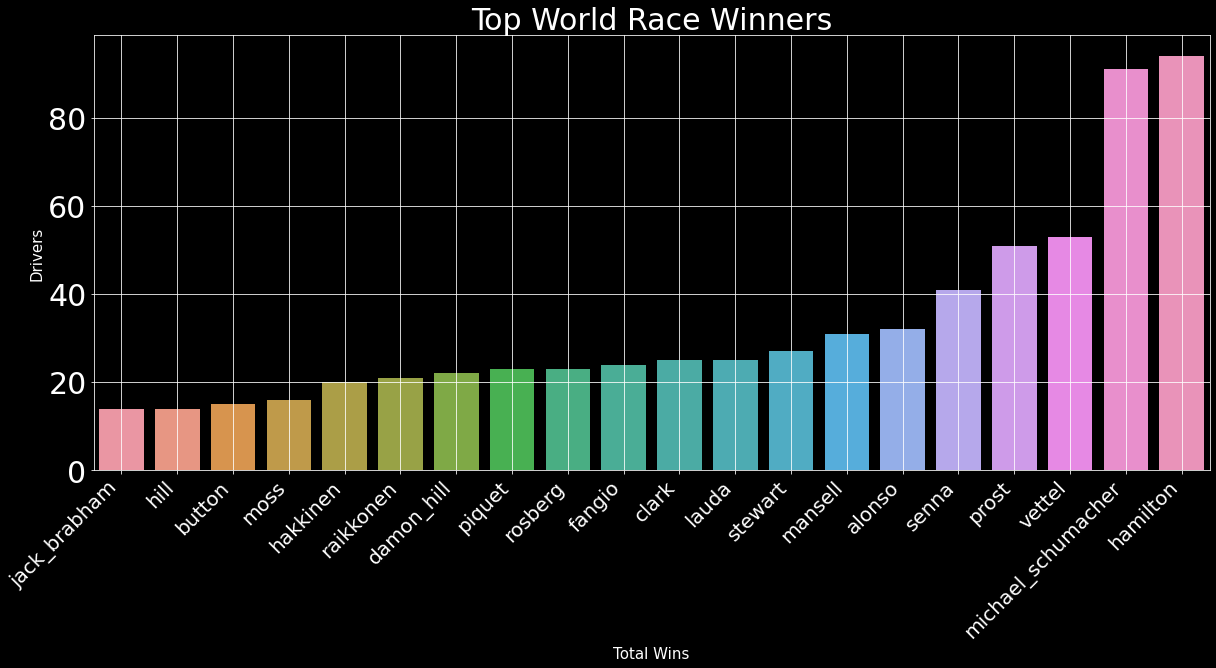

In [77]:
topBritish = results_drivers_merge.loc[(results_drivers_merge['nationality'] == 'British') & 
                                       (results_drivers_merge['positionOrder'] == 1)].groupby('driverRef')['raceId'].count().sort_values(ascending=False)[:10]
topBritish = topBritish.sort_values()

topWorld = results_drivers_merge.loc[(results_drivers_merge['positionOrder'] == 1)].groupby('driverRef')['raceId'].count().sort_values(ascending=False)[:20]
topWorld = topWorld.sort_values()

f,ax = plt.subplots(figsize =(20,8))
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=20)

sns.barplot(list(topBritish.index), list(topBritish.values))
ax.set_facecolor('k')
ax.patch.set_alpha(0.9)
plt.title("Top British Race Winners",fontsize=20)
plt.ylabel('Drivers',fontsize = 15)
plt.xlabel('Total Wins',fontsize = 15,)
plt.grid()
plt.show()

f,ax = plt.subplots(figsize =(20,8))
ax.tick_params(axis="x", labelsize=20)
ax.tick_params(axis="y", labelsize=30)

sns.barplot(list(topWorld.index), list(topWorld.values))
ax.set_facecolor('k')
ax.patch.set_alpha(0.9)
plt.xticks(rotation=45, ha='right')
plt.title("Top World Race Winners",fontsize=30)
plt.ylabel('Drivers',fontsize = 15)
plt.xlabel('Total Wins',fontsize = 15,)
plt.grid()
plt.show()


Hamilton has surpassed Schumacher in the most number of wins.

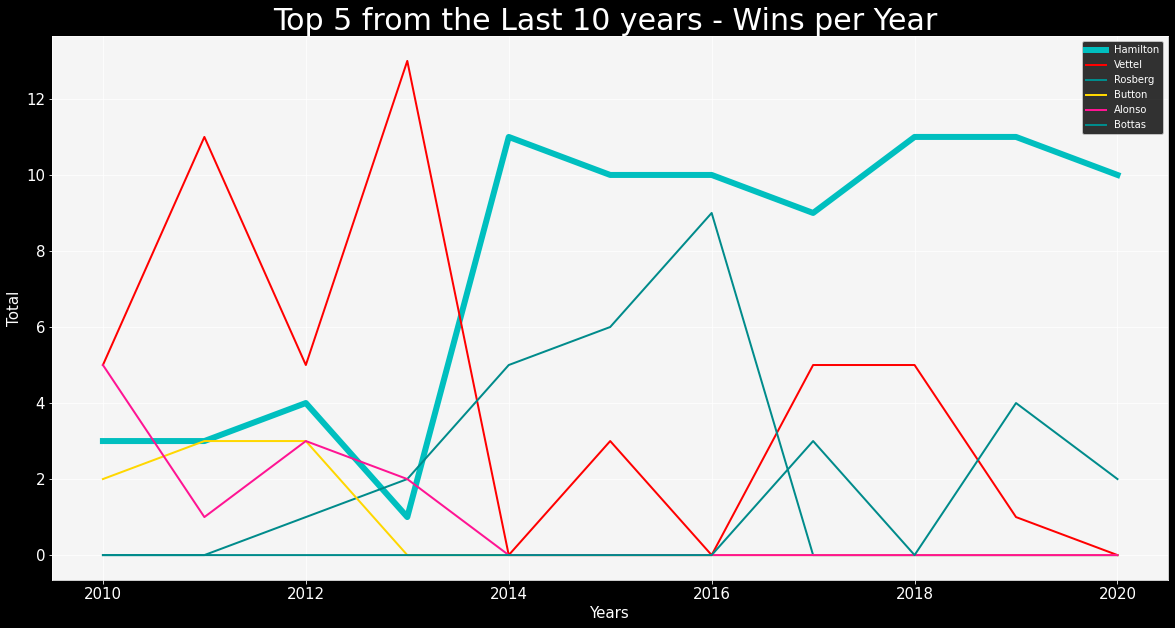

In [78]:
def wins_per_year(driverRef, year):
    try:
        return topTenYears.loc[(topTenYears['driverRef'] == driverRef) & (topTenYears['positionOrder'] == 1) & 
                               (topTenYears['year'] == year)].groupby('driverId')['raceId'].count().values[0]
    except:
        return 0

topTenYears = pd.merge(results,races,on='raceId',how='inner')
topTenYears = pd.merge(topTenYears,drivers,on='driverId',how='inner')
hamWinsPerYear = []
vetWinsPerYear = []
rosWinsPerYear = []
butWinsPerYear = []
aloWinsPerYear = []
botWinsPerYear = []

x = (2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020)

for year in x:
    hamWinsPerYear.append(wins_per_year('hamilton',year))
    vetWinsPerYear.append(wins_per_year('vettel',year))
    rosWinsPerYear.append(wins_per_year('rosberg',year))
    butWinsPerYear.append(wins_per_year('button',year))
    aloWinsPerYear.append(wins_per_year('alonso',year))
    botWinsPerYear.append(wins_per_year('bottas',year))

f,ax = plt.subplots(figsize =(20,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)

ax.set_facecolor('whitesmoke')
line1, = ax.plot(x, hamWinsPerYear, label='Hamilton', color='c',linewidth=6,)
line2, = ax.plot(x, vetWinsPerYear, label='Vettel' ,linewidth=2, color='r')
line3, = ax.plot(x, rosWinsPerYear, label='Rosberg', color='darkcyan',linewidth=2,)
line4, = ax.plot(x, butWinsPerYear, label='Button' ,linewidth=2, color='gold')
line5, = ax.plot(x, aloWinsPerYear, label='Alonso', color='deeppink',linewidth=2,)
line5, = ax.plot(x, botWinsPerYear, label='Bottas', color='darkcyan',linewidth=2,)
plt.title("Top 5 from the Last 10 years - Wins per Year ",fontsize=30)
plt.ylabel('Total',fontsize = 15)
plt.xlabel('Years',fontsize = 15,)
plt.grid()
ax.legend()
plt.show()



In [79]:
topTenYears

resultId  raceId  driverId  constructorId  number_x  grid  position  \
0             1      18         1              1        22     1         1   
1            27      19         1              1        22     9         5   
2            57      20         1              1        22     3        13   
3            69      21         1              1        22     5         3   
4            90      22         1              1        22     3         2   
...         ...     ...       ...            ...       ...   ...       ...   
24895     24821    1040       849              3         6    20        16   
24896     24839    1041       849              3         6    18        14   
24897     24863    1042       849              3         6    20        18   
24898     24876    1043       849              3         6    19        11   
24899     24904    1044       849              3         6     0         0   

      positionText  positionOrder  points  laps   time_x  milliseconds  \
0                1              1    10.0    58  34:50.6       5690616   
1                5              5     4.0    56   46.548       5525103   
2               13             13     0.0    56        0             0   
3                3              3     6.0    66    4.187       5903238   
4                2              2     8.0    58    3.779       5213230   
...            ...            ...     ...   ...      ...           ...   
24895           16             16     0.0    52        0             0   
24896           14             14     0.0    60   54.449       5804090   
24897           18             18     0.0    64        0             0   
24898           11             11     0.0    63   27.135       5339565   
24899            R             19     0.0    39        0             0   

       fastestLap  rank  fastestLapTime  fastestLapSpeed  statusId  year  \
0              39     2            87.5          218.300         1  2008   
1              53     3            95.5          209.033         1  2008   
2              25    19            95.5          203.969        11  2008   
3              20     3            82.0          204.323         1  2008   
4              31     2            86.5          222.085         1  2008   
...           ...   ...             ...              ...       ...   ...   
24895          47    18           101.0          208.352        11  2020   
24896          39    13            91.4          202.816         1  2020   
24897          53    19            81.9          204.629        12  2020   
24898          37    14            78.7          224.499         1  2020   
24899          32    19           103.5          185.678       130  2020   

       round  circuitId                       name        date    time_y  \
0          1          1      Australian Grand Prix  2008-03-16  04:30:00   
1          2          2       Malaysian Grand Prix  2008-03-23  07:00:00   
2          3          3         Bahrain Grand Prix  2008-04-06  11:30:00   
3          4          4         Spanish Grand Prix  2008-04-27  12:00:00   
4          5          5         Turkish Grand Prix  2008-05-11  12:00:00   
...      ...        ...                        ...         ...       ...   
24895     10         71         Russian Grand Prix  2020-09-27  11:10:00   
24896     11         20           Eifel Grand Prix  2020-10-11  13:10:00   
24897     12         75      Portuguese Grand Prix  2020-10-25  12:10:00   
24898     13         21  Emilia Romagna Grand Prix  2020-11-01  12:10:00   
24899     14          5         Turkish Grand Prix  2020-11-15  10:10:00   

                                                   url_x driverRef number_y  \
0      http://en.wikipedia.org/wiki/2008_Australian_G...  hamilton       44   
1      http://en.wikipedia.org/wiki/2008_Malaysian_Gr...  hamilton       44   
2      http://en.wikipedia.org/wiki/2008_Bahrain_Gran...  hamilton       44   
3      http://en.wikipedia.org/wiki/200

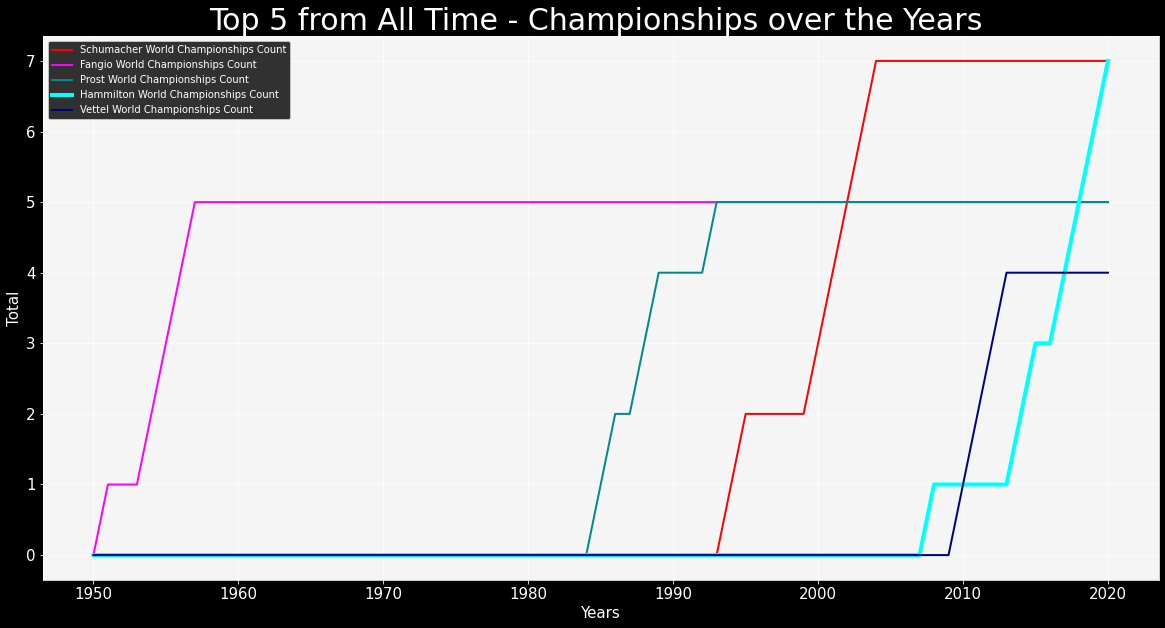

In [80]:
def championsInYears(years, driverRef):
    total = []
    t = 0
    for year in years:
        winner = topTenYears.loc[topTenYears['year']== year].groupby('driverRef')['points'].sum().sort_values(ascending = False).index[0]
        if winner == driverRef:
            t = t + 1
        total.append(t)
    return total

schumiCP = championsInYears(np.sort(topTenYears['year'].unique()),'michael_schumacher')
fangioCP = championsInYears(np.sort(topTenYears['year'].unique()),'fangio')
prostCP = championsInYears(np.sort(topTenYears['year'].unique()),'prost')
hamiltonCP = championsInYears(np.sort(topTenYears['year'].unique()),'hamilton')
vettelCP = championsInYears(np.sort(topTenYears['year'].unique()),'vettel')

x = range(1950,2021)

f,ax = plt.subplots(figsize =(20,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)

ax.set_facecolor('whitesmoke')
line1, = ax.plot(x, schumiCP, label='Schumacher World Championships Count', color='r',linewidth=2,)
line2, = ax.plot(x, fangioCP, label='Fangio World Championships Count' ,linewidth=2, color='magenta')
line3, = ax.plot(x, prostCP, label='Prost World Championships Count', color='darkcyan',linewidth=2,)
line4, = ax.plot(x, hamiltonCP, label='Hammilton World Championships Count' ,linewidth=4, color='aqua')
line5, = ax.plot(x, vettelCP, label='Vettel World Championships Count', color='darkblue',linewidth=2,)
plt.title("Top 5 from All Time - Championships over the Years ",fontsize=30)
plt.ylabel('Total',fontsize = 15)
plt.xlabel('Years',fontsize = 15,)
plt.grid()
ax.legend()
plt.show()

#### Hamilton Rosberg Rivalry

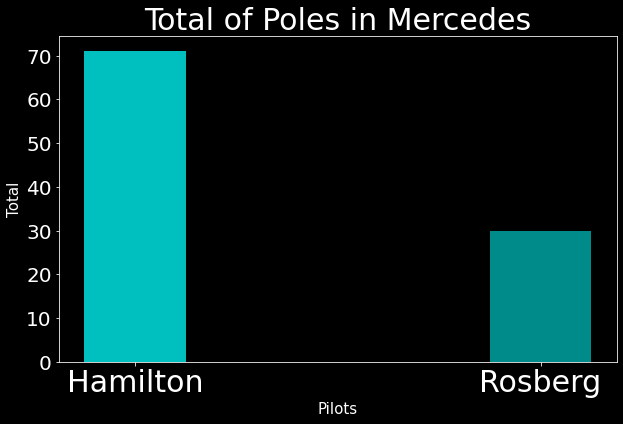

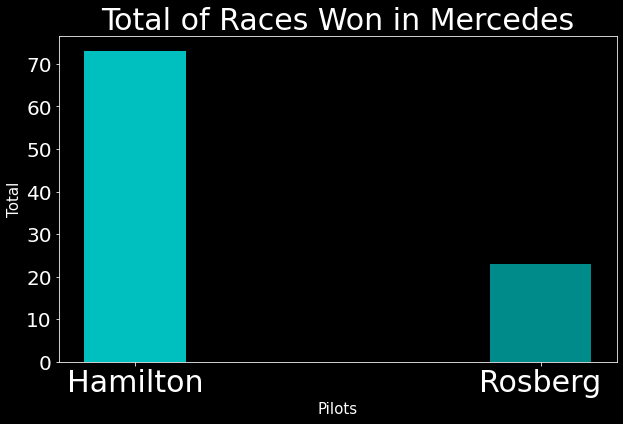

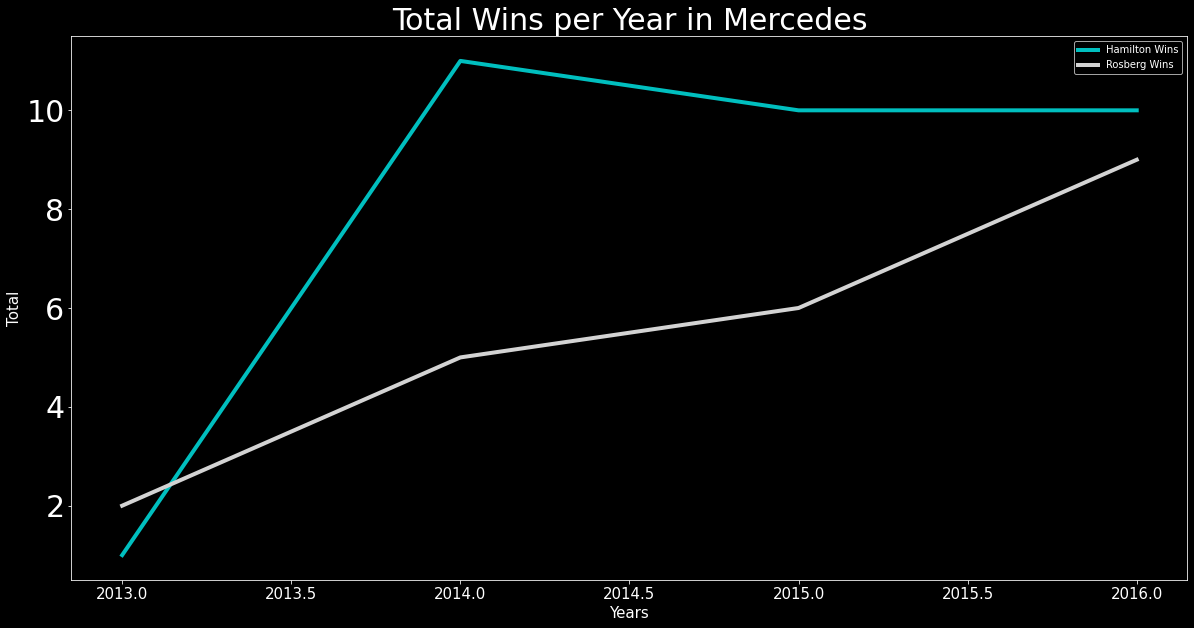

In [81]:
result_races = pd.merge(results,races, how = 'inner',on = 'raceId')
mercedesId = constructors.loc[(constructors['constructorRef'] == 'mercedes')]['constructorId'].values[0]  #131
hamQtdQualy = len(qualifying.loc[(qualifying['driverId'] == 1) & (qualifying['position'] == 1) & (qualifying['constructorId'] == mercedesId)]) # 46
rosQtdQualy = len(qualifying.loc[(qualifying['driverId'] == 3 ) & (qualifying['position'] == 1) & (qualifying['constructorId'] == mercedesId)]) # 30
hamQtdRaces = len(results.loc[(results['positionOrder'] == 1) & (results['driverId'] == 1) & (results['constructorId'] == 131)])
rosQtdRaces = len(results.loc[(results['positionOrder'] == 1) & (results['driverId'] == 3) & (results['constructorId'] == 131)])
hamWinsPerYear = result_races.loc[(result_races['driverId']==1) & (result_races['constructorId'] == 131) & (result_races['positionOrder'] == 1) & (result_races['year'] < 2017)].groupby('year')['driverId'].count()
rosWinsPerYear = result_races.loc[(result_races['driverId']==3) & (result_races['constructorId'] == 131) & (result_races['positionOrder'] == 1) & (result_races['year'] > 2012)].groupby('year')['driverId'].count()

f,ax = plt.subplots(figsize =(10,6))
ax.tick_params(axis="x", labelsize=30)
ax.tick_params(axis="y", labelsize=20)

ax.bar(['Hamilton','Rosberg'], [hamQtdQualy,rosQtdQualy], width = 0.25, color = ['c','darkcyan'])
ax.set_facecolor('k')
plt.title("Total of Poles in Mercedes",fontsize=30)
plt.ylabel('Total',fontsize = 15)
plt.xlabel('Pilots',fontsize = 15,)
plt.show()

f,ax = plt.subplots(figsize =(10,6))
ax.tick_params(axis="x", labelsize=30)
ax.tick_params(axis="y", labelsize=20)

ax.bar(['Hamilton','Rosberg'], [hamQtdRaces,rosQtdRaces], width = 0.25, color = ['c','darkcyan'], align='center')
ax.set_facecolor('k')
plt.title("Total of Races Won in Mercedes",fontsize=30)
plt.ylabel('Total',fontsize = 15)
plt.xlabel('Pilots',fontsize = 15,)
plt.show()

x = list(hamWinsPerYear.index)
y = hamWinsPerYear
f,ax = plt.subplots(figsize =(20,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=30)

ax.set_facecolor('k')
line1, = ax.plot(x, hamWinsPerYear.values, label = 'Hamilton Wins', color='c',linewidth=4,)
line2, = ax.plot(x, rosWinsPerYear.values, label = 'Rosberg Wins' ,linewidth=4, color='lightgray')
plt.title("Total Wins per Year in Mercedes",fontsize=30)
plt.ylabel('Total',fontsize = 15)
plt.xlabel('Years',fontsize = 15,)
ax.legend()
plt.show()

#### Iconic races for Hamilton

Suzuka GP 2015 

In [82]:
pd.merge(drivers,results.loc[(results['raceId'] == 940)],on='driverId',how='inner').sort_values(['positionOrder'])[:3]

driverId driverRef number_x code   forename   surname         dob  \
0         1  hamilton       44  HAM      Lewis  Hamilton  1985-01-07   
1         3   rosberg        6  ROS       Nico   Rosberg  1985-06-27   
6        20    vettel        5  VET  Sebastian    Vettel  1987-07-03   

  nationality                                            url  \
0     British    http://en.wikipedia.org/wiki/Lewis_Hamilton   
1      German      http://en.wikipedia.org/wiki/Nico_Rosberg   
6      German  http://en.wikipedia.org/wiki/Sebastian_Vettel   

           fullName  resultId  raceId  constructorId  number_y  grid  \
0    Lewis Hamilton     22796     940            131        44     2   
1      Nico Rosberg     22797     940            131         6     1   
6  Sebastian Vettel     22798     940              6         5     4   

   position positionText  positionOrder  points  laps     time  milliseconds  \
0         1            1              1    25.0    53  28:06.5       5286508   
1         2            2              2    18.0    53   18.964       5305472   
6         3            3              3    15.0    53    20.85       5307358   

   fastestLap  rank  fastestLapTime  fastestLapSpeed  statusId  
0          33     1            96.1          217.434         1  
1          31     2            97.1          215.191         1  
6          32     3            97.9          213.523         1

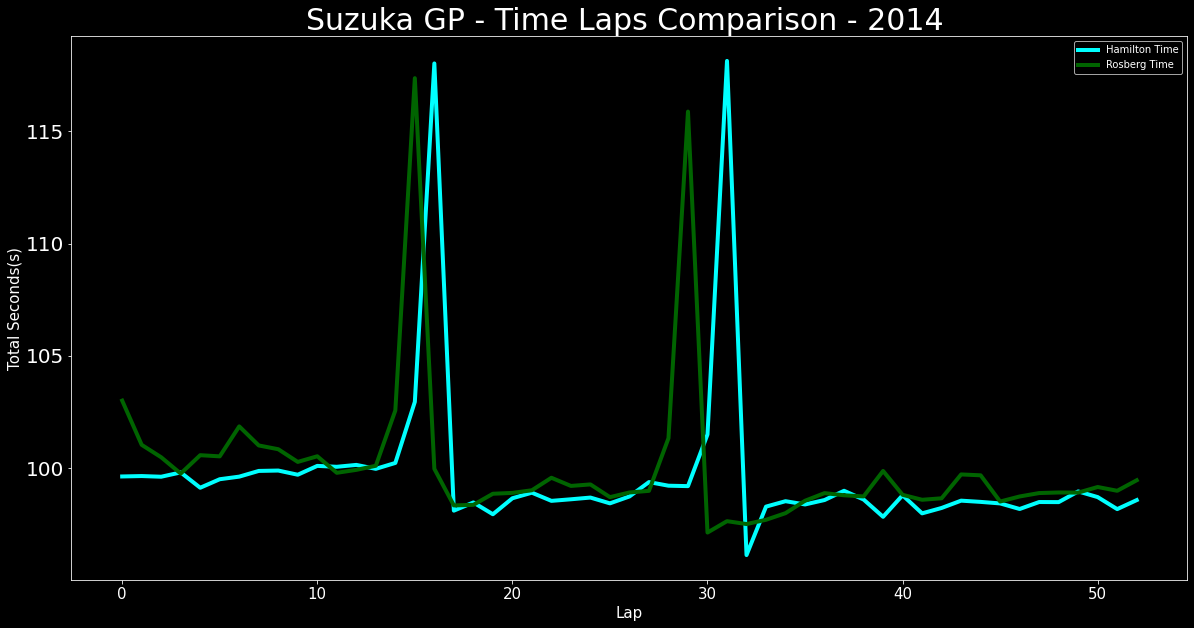

In [83]:
timeHamilton = lap_times.loc[((lap_times['driverId'] == 1) & (lap_times['raceId']==940))]['time'].iloc[:].values
timeRos = lap_times.loc[(lap_times['driverId'] == 3) & (lap_times['raceId']==940)]['time'].iloc[:].values

x = range(0,53)
f,ax = plt.subplots(figsize =(20,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=20)

ax.set_facecolor((0, 0, 0))
ax.patch.set_alpha(0.9)
line1, = ax.plot(x, timeHamilton, label='Hamilton Time', color = 'cyan',linewidth=4,)
line2, = ax.plot(x, timeRos, label='Rosberg Time', color = 'darkgreen' ,linewidth=4,)
plt.title("Suzuka GP - Time Laps Comparison - 2014 ",fontsize=30)
plt.ylabel('Total Seconds(s)',fontsize = 15)
plt.xlabel('Lap',fontsize = 15,)
ax.legend()
plt.show()

Monza GP 2011

Biggest battle between Hamilton and the 7 time world champ Schumacher

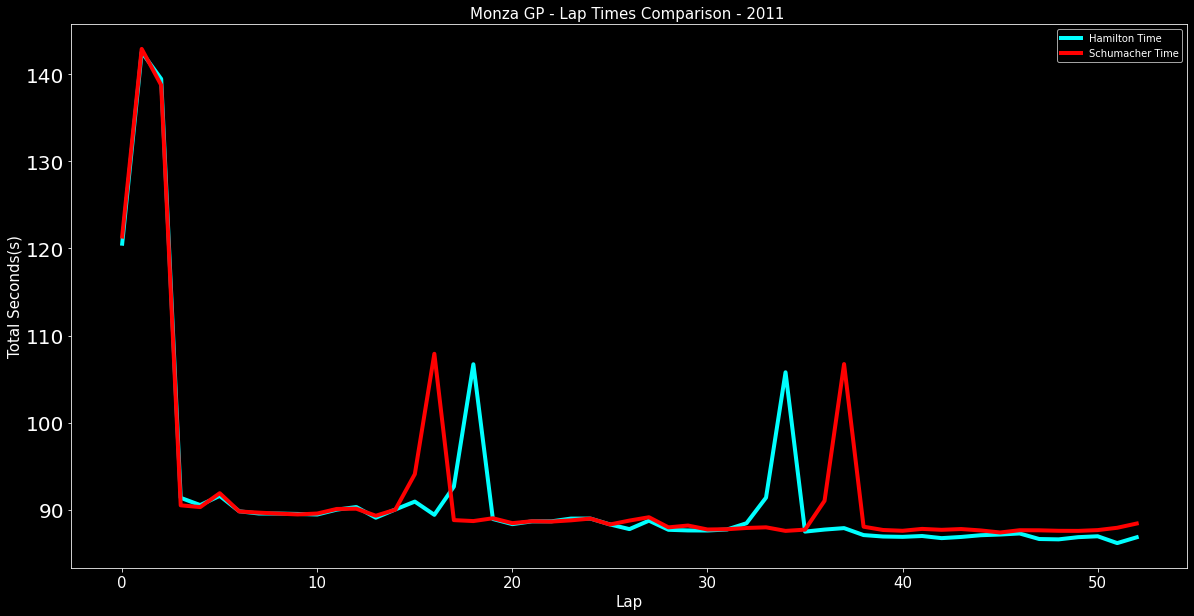

In [84]:
timeHamilton = lap_times.loc[((lap_times['driverId'] == 1) & (lap_times['raceId'] == 853))]['time'].iloc[:].values
timeSchumi = lap_times.loc[(lap_times['driverId'] == 30) & (lap_times['raceId'] == 853)]['time'].iloc[:].values
x = range(0,53)
f,ax = plt.subplots(figsize =(20,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=20)

ax.set_facecolor((0, 0, 0))
ax.patch.set_alpha(0.9)
line1, = ax.plot(x, timeHamilton, label = 'Hamilton Time', color = 'cyan',linewidth=4,)
line2, = ax.plot(x, timeSchumi, label = 'Schumacher Time' , color = 'red',linewidth=4,)
plt.title("Monza GP - Lap Times Comparison - 2011 ",fontsize=15)
plt.ylabel('Total Seconds(s)',fontsize = 15)
plt.xlabel('Lap',fontsize = 15,)
ax.legend()
plt.show()

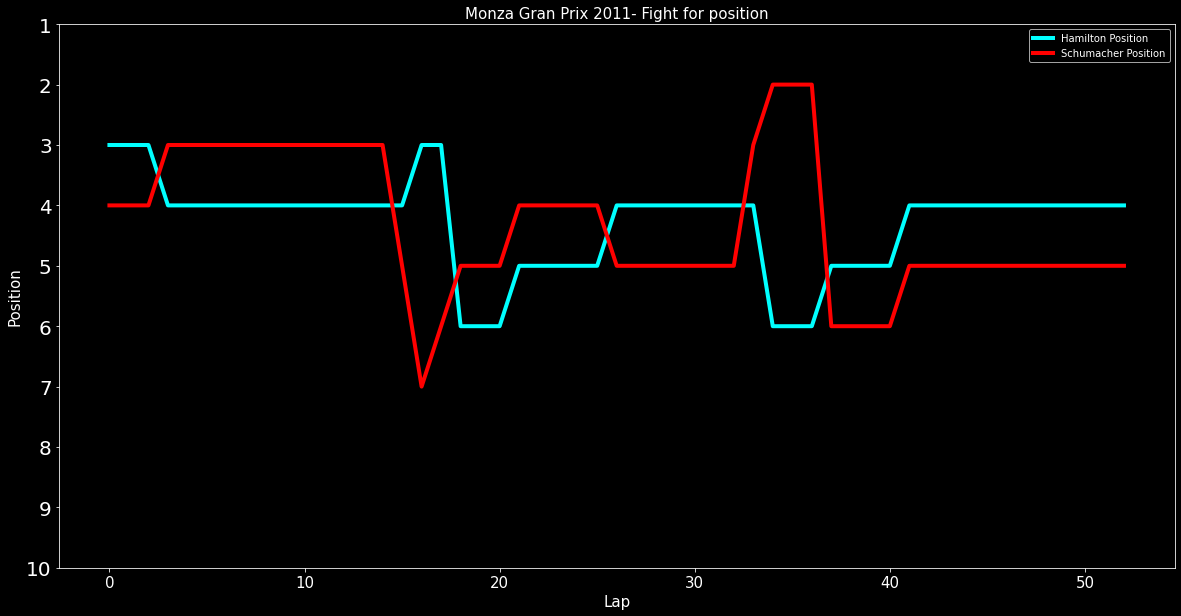

In [85]:
positionsHamilton = lap_times.loc[((lap_times['driverId'] == 1) & (lap_times['raceId'] == 853))]['position'].iloc[:].values
positionsSchumi = lap_times.loc[(lap_times['driverId'] == 30) & (lap_times['raceId'] == 853)]['position'].iloc[:].values

x = range(0,53)
f,ax = plt.subplots(figsize =(20,10))
ax.tick_params(axis = "x", labelsize=15)
ax.tick_params(axis = "y", labelsize=20)

ax.set_facecolor((0, 0, 0))
ax.patch.set_alpha(0.9)
line1, = ax.plot(x, positionsHamilton, label = 'Hamilton Position', color = 'cyan',linewidth=4,)
line2, = ax.plot(x, positionsSchumi, label = 'Schumacher Position', color = 'red' ,linewidth=4,)
plt.title("Monza Gran Prix 2011- Fight for position",fontsize=15)
plt.ylabel('Position',fontsize = 15)
plt.xlabel('Lap',fontsize = 15,)
ax.legend()
plt.ylim(10, 1)
plt.show()

British GP - 2020

Hamilton's last lap = Lightning McQueen

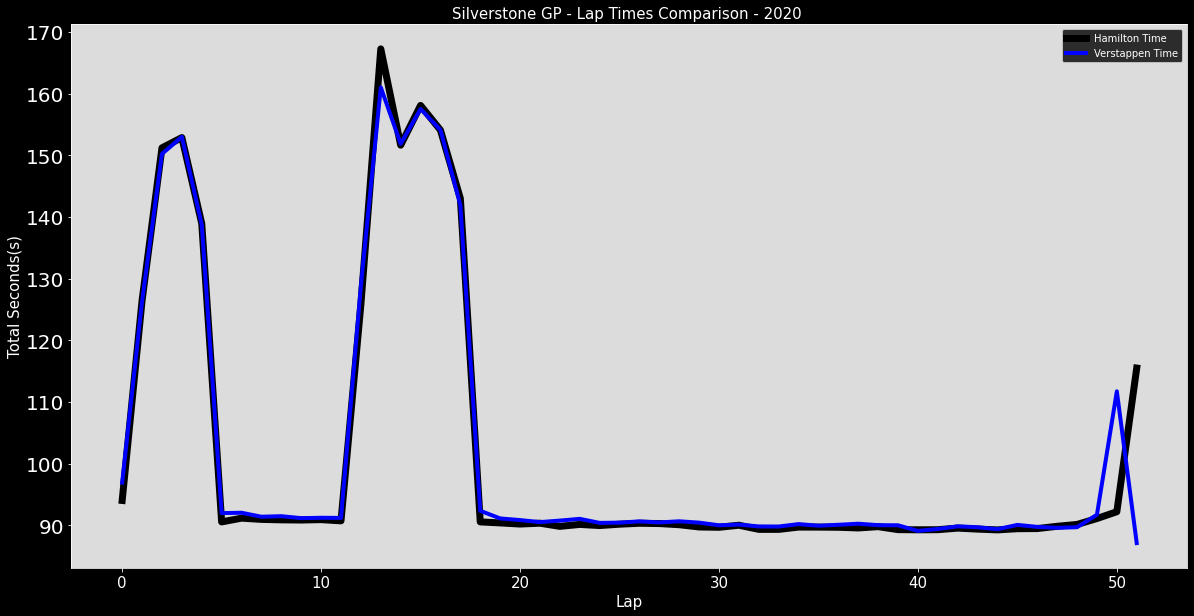

In [107]:
timeHamilton = lap_times.loc[((lap_times['driverId'] == 1) & (lap_times['raceId']==1034))]['time'].iloc[:].values
timeVerst = lap_times.loc[(lap_times['driverId'] == 830) & (lap_times['raceId']==1034)]['time'].iloc[:].values
x = range(0,52)
f,ax = plt.subplots(figsize =(20,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=20)

ax.set_facecolor('whitesmoke')
ax.patch.set_alpha(0.9)
line1, = ax.plot(x, timeHamilton, label='Hamilton Time', color='k',linewidth=7,)
line2, = ax.plot(x, timeVerst, label='Verstappen Time' ,color='blue', linewidth=4,)
plt.title("Silverstone GP - Lap Times Comparison - 2020 ",fontsize=15)
plt.ylabel('Total Seconds(s)',fontsize = 15)
plt.xlabel('Lap',fontsize = 15,)
ax.legend()
plt.show()

Turkish GP - 2020

Hamiltons's 7th Title winning race

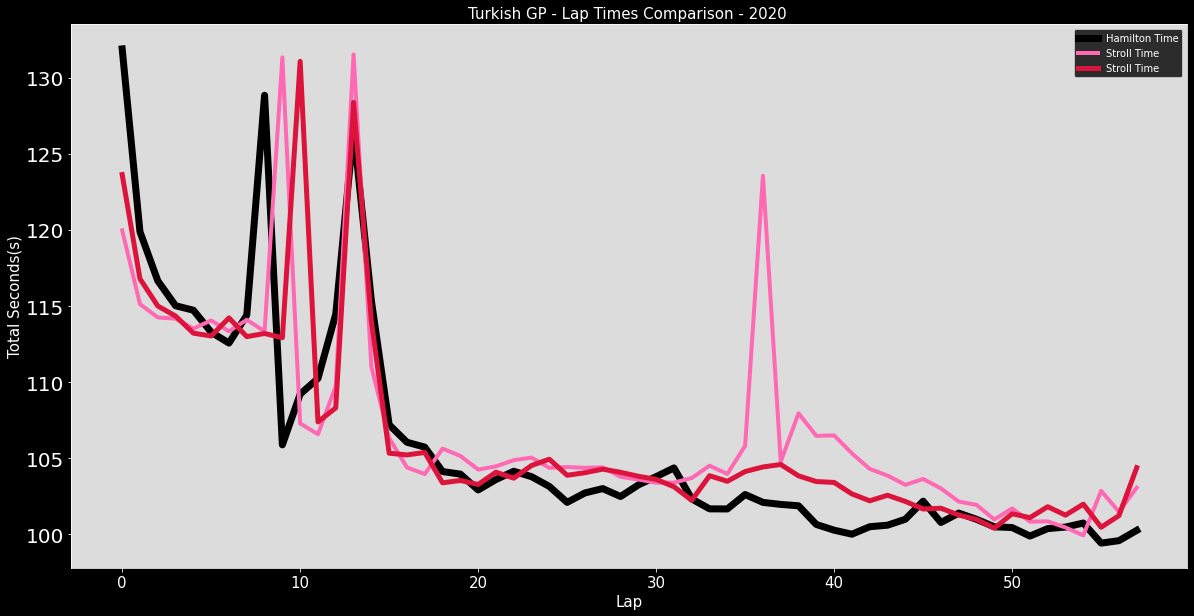

In [108]:
timeHamilton = lap_times.loc[((lap_times['driverId'] == 1) & (lap_times['raceId']==1044))]['time'].iloc[:].values
timeStroll = lap_times.loc[(lap_times['driverId'] == 840) & (lap_times['raceId']==1044)]['time'].iloc[:].values
timePerez = lap_times.loc[(lap_times['driverId'] == 815) & (lap_times['raceId']==1044)]['time'].iloc[:].values

x = range(0,58)
f,ax = plt.subplots(figsize =(20,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=20)

ax.set_facecolor('whitesmoke')
ax.patch.set_alpha(0.9)
line1, = ax.plot(x, timeHamilton, label='Hamilton Time', color='k',linewidth=7,)
line2, = ax.plot(x, timeStroll, label='Stroll Time' , color='hotpink',linewidth=4,)
line3, = ax.plot(x, timePerez, label='Stroll Time' , color='crimson',linewidth=5,)
plt.title("Turkish GP - Lap Times Comparison - 2020 ",fontsize=15)
plt.ylabel('Total Seconds(s)',fontsize = 15)
plt.xlabel('Lap',fontsize = 15,)
ax.legend()
plt.show()

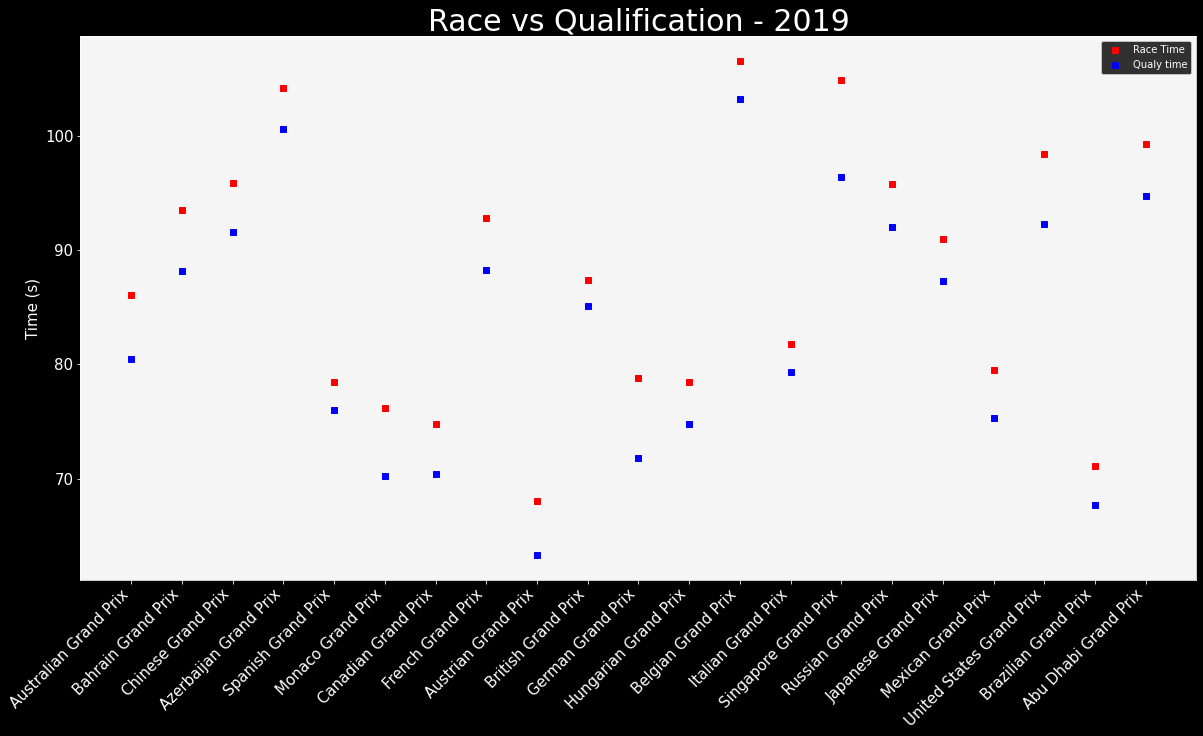

In [87]:
racesQualysHam = pd.merge(topTenYears.loc[(topTenYears['driverRef']=='hamilton') & 
                                          (topTenYears['year']==2019)], qualifying.loc[(qualifying['q3']!= 0) & 
                                                                                       (qualifying['driverId'] == 1)], on='raceId', how='inner')
q3s = racesQualysHam['q3'].values
raceTimes = racesQualysHam['fastestLapTime'].values
x = racesQualysHam.name.values

f,ax = plt.subplots(figsize =(20,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)

ax.set_facecolor('whitesmoke')
line1, = ax.plot(x, raceTimes, 'bs',c='red',label="Race Time")
line2, = ax.plot(x, q3s,'bs', c='blue', label="Qualy time")
plt.title("Race vs Qualification - 2019",fontsize=30)
plt.ylabel('Time (s)',fontsize = 15)
plt.xticks(rotation=45, ha='right')
ax.legend()
plt.show()

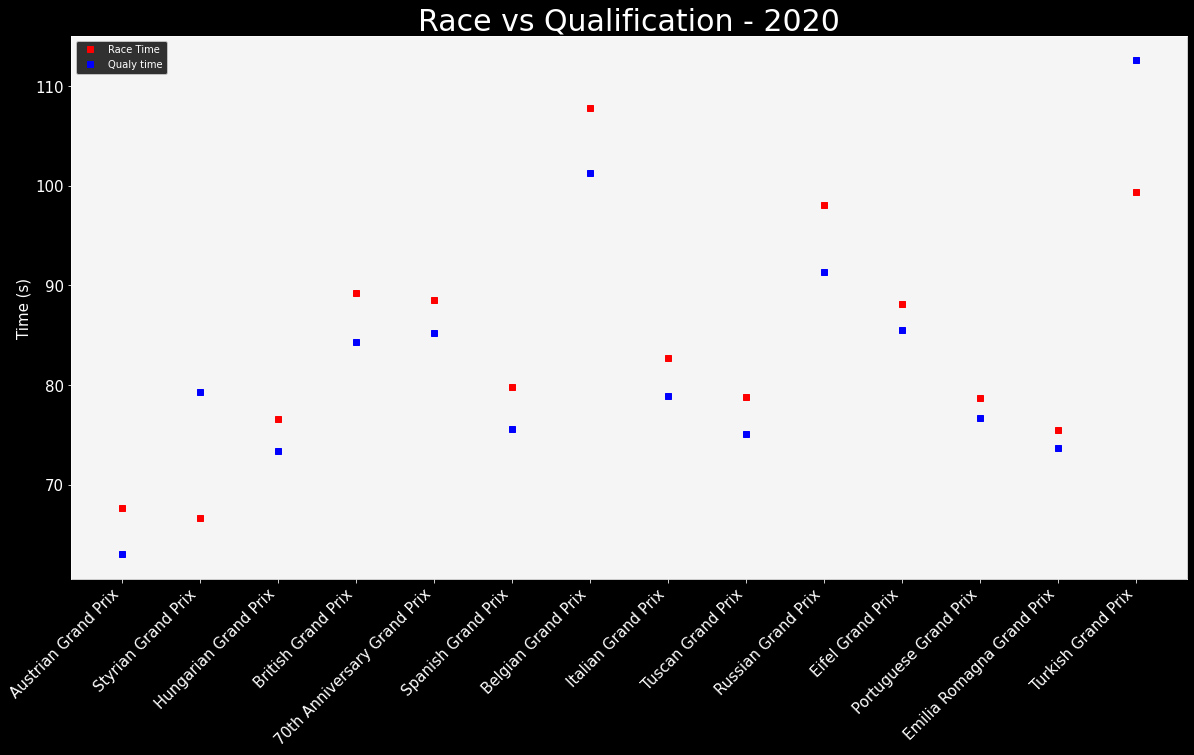

In [88]:
racesQualysHam = pd.merge(topTenYears.loc[(topTenYears['driverRef']=='hamilton') & 
                                          (topTenYears['year']==2020)], qualifying.loc[(qualifying['q3']!= 0) & 
                                                                                       (qualifying['driverId'] == 1)], on='raceId', how='inner')
q3s = racesQualysHam['q3'].values
raceTimes = racesQualysHam['fastestLapTime'].values
x = racesQualysHam.name.values

f,ax = plt.subplots(figsize =(20,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)

ax.set_facecolor('whitesmoke')
line1, = ax.plot(x, raceTimes, 'bs',c='red',label="Race Time")
line2, = ax.plot(x, q3s,'bs', c='blue', label="Qualy time")
plt.title("Race vs Qualification - 2020",fontsize=30)
plt.ylabel('Time (s)',fontsize = 15)
plt.xticks(rotation=45, ha='right')
ax.legend()
plt.show()

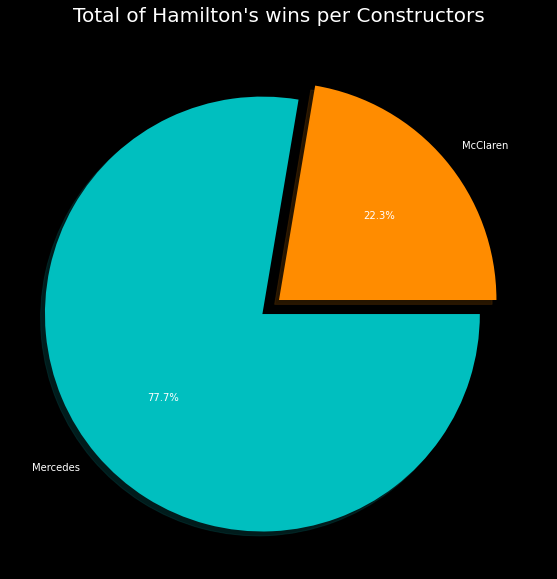

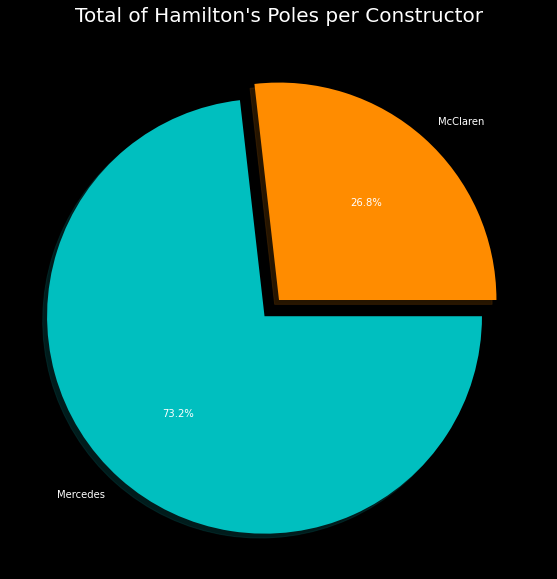

In [89]:
qtdMcl = len(topTenYears.loc[(topTenYears['driverRef']=='hamilton') & (topTenYears['positionOrder']==1) & (topTenYears['constructorId']==1)])
qtdMcd = len(topTenYears.loc[(topTenYears['driverRef']=='hamilton') & (topTenYears['positionOrder']==1) & (topTenYears['constructorId']==131)])
qtdQualMCL = len(qualifying.loc[(qualifying['driverId'] == 1) & (qualifying['position'] == 1) & (qualifying['constructorId'] == 1)])
qtdQualMCD = len(qualifying.loc[(qualifying['driverId'] == 1) & (qualifying['position'] == 1) & (qualifying['constructorId'] == 131)])

f,ax = plt.subplots(figsize =(20,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=30)

ax.pie([qtdMcl,qtdMcd], labels=['McClaren','Mercedes'],explode=(0, 0.1),shadow=True,colors=['darkorange','c'],autopct='%1.1f%%')
ax.set_facecolor('whitesmoke')
plt.title("Total of Hamilton's wins per Constructors",fontsize=20)
plt.show()

f,ax = plt.subplots(figsize =(20,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=30)

ax.pie([qtdQualMCL,qtdQualMCD], labels=['McClaren','Mercedes'],explode=(0, 0.1),shadow=True,colors=['darkorange','c'],autopct='%1.1f%%')
ax.set_facecolor('whitesmoke')
plt.title("Total of Hamilton's Poles per Constructor",fontsize=20)
plt.show()

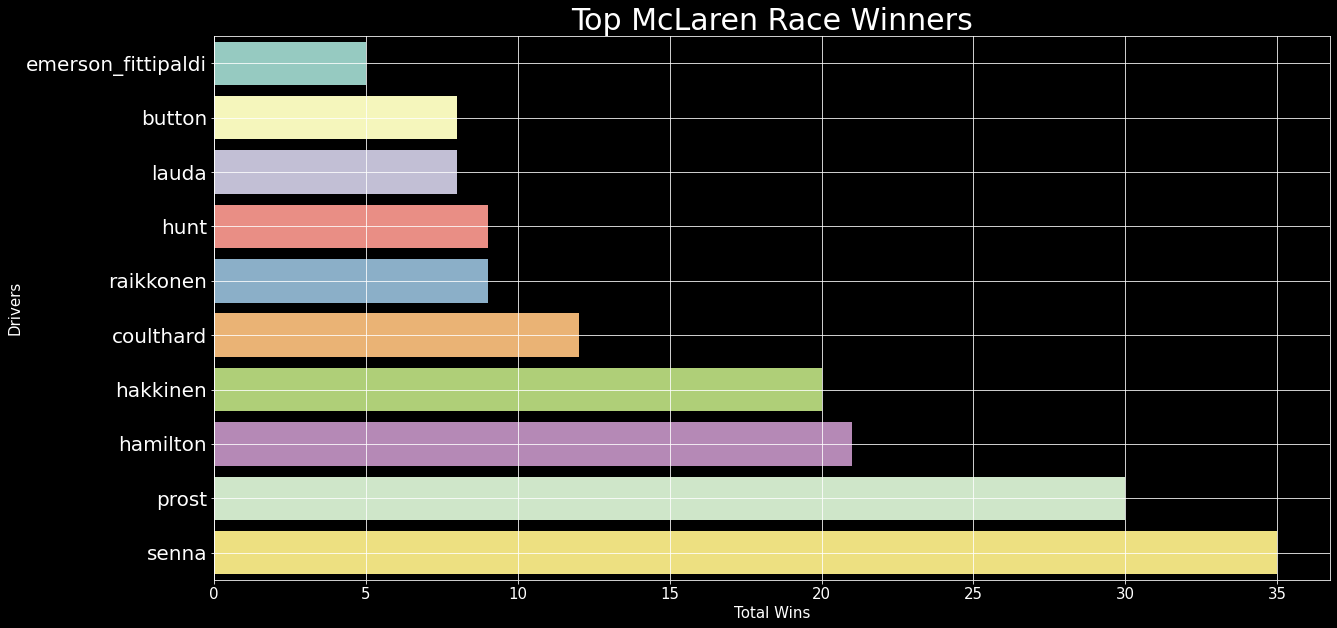

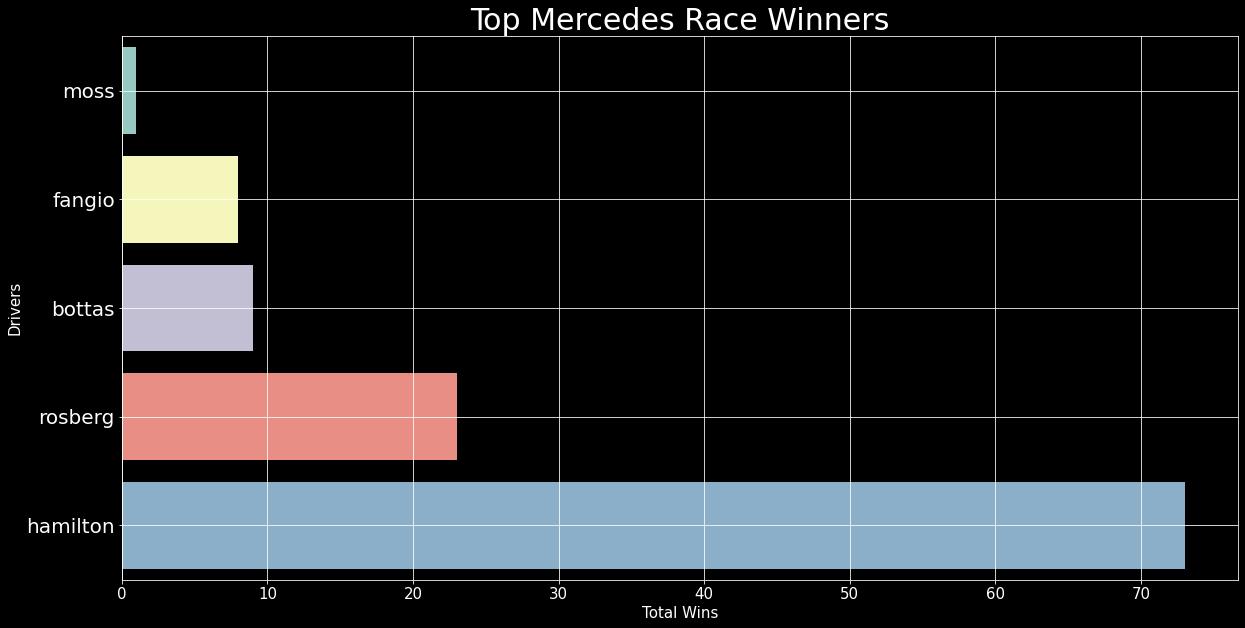

In [90]:
mclarensRacers = topTenYears.loc[(topTenYears['constructorId']==1)&(topTenYears['positionOrder']==1)].groupby('driverRef')['raceId'].count().sort_values(ascending=False)[:10]
mclarensRacers = mclarensRacers.sort_values()

mercedesRacers = topTenYears.loc[(topTenYears['constructorId']==131)&(topTenYears['positionOrder']==1)].groupby('driverRef')['raceId'].count().sort_values(ascending=False)[:10]
mercedesRacers = mercedesRacers.sort_values()

f,ax = plt.subplots(figsize =(20,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=20)

sns.barplot(list(mclarensRacers.values), list(mclarensRacers.index))
sns.color_palette("hls", 8)
ax.set_facecolor('k')
ax.patch.set_alpha(0.9)
plt.title("Top McLaren Race Winners",fontsize=30)
plt.ylabel('Drivers',fontsize = 15)
plt.xlabel('Total Wins',fontsize = 15,)
plt.grid()
plt.show()

f,ax = plt.subplots(figsize =(20,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=20)

sns.barplot(list(mercedesRacers.values), list(mercedesRacers.index))
sns.color_palette("hls", 8)
ax.set_facecolor('k')
ax.patch.set_alpha(0.9)
plt.title("Top Mercedes Race Winners",fontsize=30)
plt.ylabel('Drivers',fontsize = 15)
plt.xlabel('Total Wins',fontsize = 15,)
plt.grid()
plt.show()

# Race Stats Comparison between 2019 and 2020 season

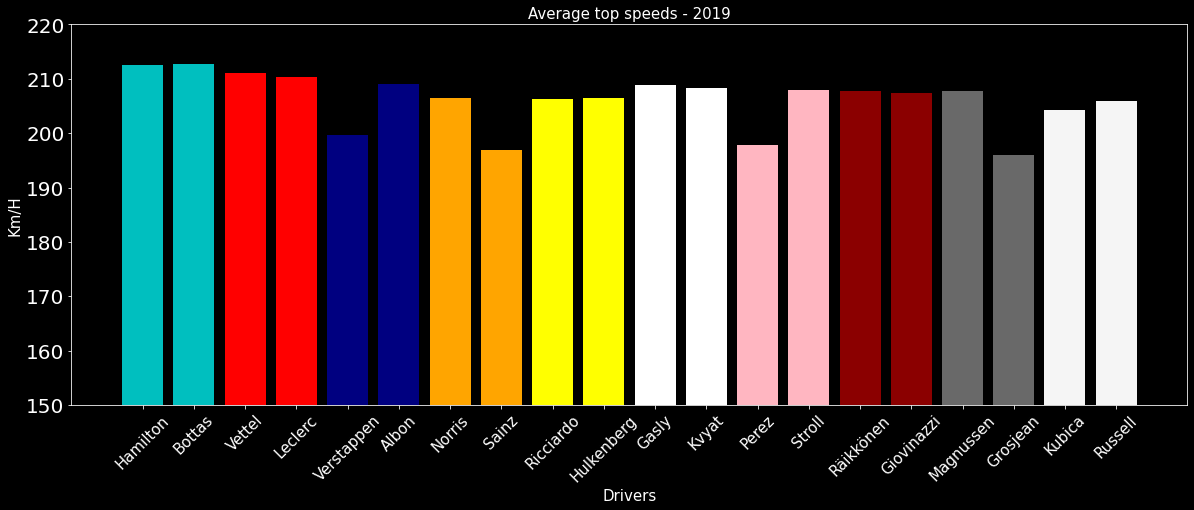

In [91]:
speedHam = (result_races.loc[((result_races['driverId'] == 1) & (result_races['year']==2019))]['fastestLapSpeed'].iloc[:].values.sum())/21
speedBot = (result_races.loc[((result_races['driverId'] == 822) & (result_races['year']==2019))]['fastestLapSpeed'].iloc[:].values.sum())/21
speedVet = (result_races.loc[((result_races['driverId'] == 20) & (result_races['year']==2019))]['fastestLapSpeed'].iloc[:].values.sum())/21
speedLec = (result_races.loc[((result_races['driverId'] == 844) & (result_races['year']==2019))]['fastestLapSpeed'].iloc[:].values.sum())/21
speedVer = (result_races.loc[((result_races['driverId'] == 830) & (result_races['year']==2019))]['fastestLapSpeed'].iloc[:].values.sum())/21
speedAlb = (result_races.loc[((result_races['driverId'] == 848) & (result_races['year']==2019))]['fastestLapSpeed'].iloc[:].values.sum())/21
speedNor = (result_races.loc[((result_races['driverId'] == 846) & (result_races['year']==2019))]['fastestLapSpeed'].iloc[:].values.sum())/21
speedSai = (result_races.loc[((result_races['driverId'] == 832) & (result_races['year']==2019))]['fastestLapSpeed'].iloc[:].values.sum())/21
speedRic = (result_races.loc[((result_races['driverId'] == 817) & (result_races['year']==2019))]['fastestLapSpeed'].iloc[:].values.sum())/21
speedHul = (result_races.loc[((result_races['driverId'] == 807) & (result_races['year']==2019))]['fastestLapSpeed'].iloc[:].values.sum())/21
speedGas = (result_races.loc[((result_races['driverId'] == 842) & (result_races['year']==2019))]['fastestLapSpeed'].iloc[:].values.sum())/21
speedKyv = (result_races.loc[((result_races['driverId'] == 826) & (result_races['year']==2019))]['fastestLapSpeed'].iloc[:].values.sum())/21
speedPerez = (result_races.loc[((result_races['driverId'] == 815) & (result_races['year']==2019))]['fastestLapSpeed'].iloc[:].values.sum())/21
speedStr = (result_races.loc[((result_races['driverId'] == 840) & (result_races['year']==2019))]['fastestLapSpeed'].iloc[:].values.sum())/21
speedRai = (result_races.loc[((result_races['driverId'] == 8) & (result_races['year']==2019))]['fastestLapSpeed'].iloc[:].values.sum())/21
speedGio = (result_races.loc[((result_races['driverId'] == 841) & (result_races['year']==2019))]['fastestLapSpeed'].iloc[:].values.sum())/21
speedMag = (result_races.loc[((result_races['driverId'] == 825) & (result_races['year']==2019))]['fastestLapSpeed'].iloc[:].values.sum())/21
speedGro = (result_races.loc[((result_races['driverId'] == 154) & (result_races['year']==2019))]['fastestLapSpeed'].iloc[:].values.sum())/21
speedKub = (result_races.loc[((result_races['driverId'] == 9) & (result_races['year']==2019))]['fastestLapSpeed'].iloc[:].values.sum())/21
speedRus = (result_races.loc[((result_races['driverId'] == 847) & (result_races['year']==2019))]['fastestLapSpeed'].iloc[:].values.sum())/21

f,ax = plt.subplots(figsize =(20,7))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=20)
plt.xticks(rotation=45)

ax.set_facecolor((0, 0, 0))
ax.patch.set_alpha(0.9)
line1, = ax.bar('Hamilton', speedHam, color='c',linewidth=4,)
line2, = ax.bar('Bottas', speedBot, color='c',linewidth=4,)
line3, = ax.bar('Vettel', speedVet, color='r',linewidth=4,)
line4, = ax.bar('Leclerc', speedLec, color='r',linewidth=4,)
line5, = ax.bar('Verstappen', speedVer, color='navy',linewidth=4,)
line6, = ax.bar('Albon', speedAlb, color='navy',linewidth=4,)
line7, = ax.bar('Norris', speedNor, color='orange',linewidth=4,)
line8, = ax.bar('Sainz', speedSai, color='orange',linewidth=4,)
line9, = ax.bar('Ricciardo', speedRic, color='yellow',linewidth=4,)
line10, = ax.bar('Hulkenberg', speedHul, color='yellow',linewidth=4,)
line11, = ax.bar('Gasly', speedGas, color='white',linewidth=4,)
line12, = ax.bar('Kvyat', speedKyv, color='white',linewidth=4,)
line13, = ax.bar('Perez', speedPerez, color='lightpink',linewidth=4,)
line14, = ax.bar('Stroll', speedStr, color='lightpink',linewidth=4,)
line15, = ax.bar('Räikkönen', speedRai, color='darkred',linewidth=4,)
line16, = ax.bar('Giovinazzi', speedGio, color='darkred',linewidth=4,)
line17, = ax.bar('Magnussen', speedMag, color='dimgrey',linewidth=4,)
line18, = ax.bar('Grosjean', speedGro, color='dimgrey',linewidth=4,)
line19, = ax.bar('Kubica', speedKub, color='whitesmoke',linewidth=4,)
line20, = ax.bar('Russell', speedRus, color='whitesmoke',linewidth=4,)

plt.ylim(150,220)
plt.title("Average top speeds - 2019",fontsize=15)
plt.ylabel('Km/H',fontsize = 15)
plt.xlabel('Drivers',fontsize = 15,)
plt.show()

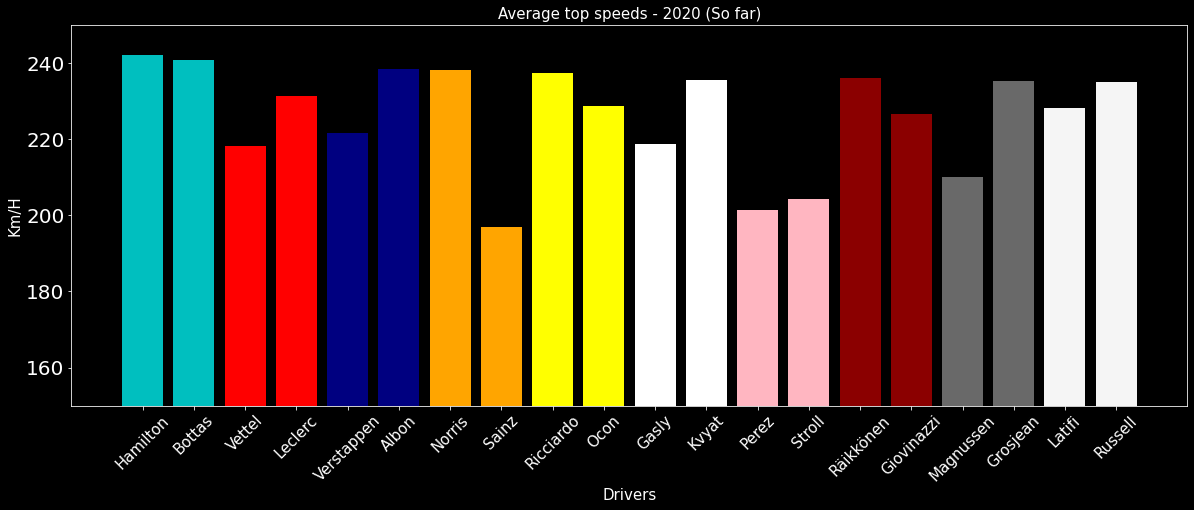

In [92]:
speedHam2 = (result_races.loc[((result_races['driverId'] == 1) & (result_races['year']==2020))]['fastestLapSpeed'].iloc[:].values.sum())/13
speedBot2 = (result_races.loc[((result_races['driverId'] == 822) & (result_races['year']==2020))]['fastestLapSpeed'].iloc[:].values.sum())/13
speedVet2 = (result_races.loc[((result_races['driverId'] == 20) & (result_races['year']==2020))]['fastestLapSpeed'].iloc[:].values.sum())/13
speedLec2 = (result_races.loc[((result_races['driverId'] == 844) & (result_races['year']==2020))]['fastestLapSpeed'].iloc[:].values.sum())/13
speedVer2 = (result_races.loc[((result_races['driverId'] == 830) & (result_races['year']==2020))]['fastestLapSpeed'].iloc[:].values.sum())/13
speedAlb2 = (result_races.loc[((result_races['driverId'] == 848) & (result_races['year']==2020))]['fastestLapSpeed'].iloc[:].values.sum())/13
speedNor2 = (result_races.loc[((result_races['driverId'] == 846) & (result_races['year']==2020))]['fastestLapSpeed'].iloc[:].values.sum())/13
speedSai2 = (result_races.loc[((result_races['driverId'] == 832) & (result_races['year']==2020))]['fastestLapSpeed'].iloc[:].values.sum())/13
speedRic2 = (result_races.loc[((result_races['driverId'] == 817) & (result_races['year']==2020))]['fastestLapSpeed'].iloc[:].values.sum())/13
speedOco = (result_races.loc[((result_races['driverId'] == 839) & (result_races['year']==2020))]['fastestLapSpeed'].iloc[:].values.sum())/13
speedGas2 = (result_races.loc[((result_races['driverId'] == 842) & (result_races['year']==2020))]['fastestLapSpeed'].iloc[:].values.sum())/13
speedKyv2 = (result_races.loc[((result_races['driverId'] == 826) & (result_races['year']==2020))]['fastestLapSpeed'].iloc[:].values.sum())/13
speedPerez2 = (result_races.loc[((result_races['driverId'] == 815) & (result_races['year']==2020))]['fastestLapSpeed'].iloc[:].values.sum())/13
speedStr2 = (result_races.loc[((result_races['driverId'] == 840) & (result_races['year']==2020))]['fastestLapSpeed'].iloc[:].values.sum())/13
speedRai2 = (result_races.loc[((result_races['driverId'] == 8) & (result_races['year']==2020))]['fastestLapSpeed'].iloc[:].values.sum())/13
speedGio2 = (result_races.loc[((result_races['driverId'] == 841) & (result_races['year']==2020))]['fastestLapSpeed'].iloc[:].values.sum())/13
speedMag2 = (result_races.loc[((result_races['driverId'] == 825) & (result_races['year']==2020))]['fastestLapSpeed'].iloc[:].values.sum())/13
speedGro2 = (result_races.loc[((result_races['driverId'] == 154) & (result_races['year']==2020))]['fastestLapSpeed'].iloc[:].values.sum())/13
speedLat = (result_races.loc[((result_races['driverId'] == 849) & (result_races['year']==2020))]['fastestLapSpeed'].iloc[:].values.sum())/13
speedRus2 = (result_races.loc[((result_races['driverId'] == 847) & (result_races['year']==2020))]['fastestLapSpeed'].iloc[:].values.sum())/13

f,ax = plt.subplots(figsize =(20,7))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=20)
plt.xticks(rotation=45)

ax.set_facecolor((0, 0, 0))
ax.patch.set_alpha(0.9)
line1, = ax.bar('Hamilton', speedHam2, color='c',linewidth=4,)
line2, = ax.bar('Bottas', speedBot2, color='c',linewidth=4,)
line3, = ax.bar('Vettel', speedVet2, color='r',linewidth=4,)
line4, = ax.bar('Leclerc', speedLec2, color='r',linewidth=4,)
line5, = ax.bar('Verstappen', speedVer2, color='navy',linewidth=4,)
line6, = ax.bar('Albon', speedAlb2, color='navy',linewidth=4,)
line7, = ax.bar('Norris', speedNor2, color='orange',linewidth=4,)
line8, = ax.bar('Sainz', speedSai2, color='orange',linewidth=4,)
line9, = ax.bar('Ricciardo', speedRic2, color='yellow',linewidth=4,)
line10, = ax.bar('Ocon', speedOco, color='yellow',linewidth=4,)
line11, = ax.bar('Gasly', speedGas2, color='white',linewidth=4,)
line12, = ax.bar('Kvyat', speedKyv2, color='white',linewidth=4,)
line13, = ax.bar('Perez', speedPerez2, color='lightpink',linewidth=4,)
line14, = ax.bar('Stroll', speedStr2, color='lightpink',linewidth=4,)
line15, = ax.bar('Räikkönen', speedRai2, color='darkred',linewidth=4,)
line16, = ax.bar('Giovinazzi', speedGio2, color='darkred',linewidth=4,)
line17, = ax.bar('Magnussen', speedMag2, color='dimgrey',linewidth=4,)
line18, = ax.bar('Grosjean', speedGro2, color='dimgrey',linewidth=4,)
line19, = ax.bar('Latifi', speedLat, color='whitesmoke',linewidth=4,)
line20, = ax.bar('Russell', speedRus2, color='whitesmoke',linewidth=4,)

plt.ylim(150,250)
plt.title("Average top speeds - 2020 (So far)",fontsize=15)
plt.ylabel('Km/H',fontsize = 15)
plt.xlabel('Drivers',fontsize = 15,)
plt.show()

In [93]:
data1 = pd.merge(data1, constructors, on='constructorId', how='left')

In [94]:
r2019 = data1[data1['year']==2019]
r2019.head()

resultId  raceId  driverId  constructorId  number_x  grid  position_x  \
3877     24203    1010       822            131        77     2           1   
3878     24204    1010         1            131        44     1           2   
3879     24205    1010       830              9        33     4           3   
3880     24206    1010        20              6         5     3           4   
3881     24207    1010       844              6        16     5           5   

     positionText  positionOrder  points  laps   time_x  milliseconds  \
3877            1              1    26.0    58  25:27.3       5127325   
3878            2              2    18.0    58   20.886       5148211   
3879            3              3    15.0    58    22.52       5149845   
3880            4              4    12.0    58   57.109       5184434   
3881            5              5    10.0    58   58.203       5185528   

      fastestLap  rank  fastestLapTime  fastestLapSpeed  statusId  qualifyId  \
3877          57     1            85.6          223.075         1     7961.0   
3878          57     2            86.1          221.839         1     7960.0   
3879          57     3            86.3          221.327         1     7963.0   
3880          16     8            88.0          217.054         1     7962.0   
3881          58     4            86.9          219.621         1     7964.0   

      number_y  position_y    q1    q2    q3  year  round  circuitId  \
3877      77.0         2.0  82.4  81.2  80.6  2019      1          1   
3878      44.0         1.0  82.0  81.0  80.5  2019      1          1   
3879      33.0         4.0  82.9  81.7  81.3  2019      1          1   
3880       5.0         3.0  82.9  81.9  81.2  2019      1          1   
3881      16.0         5.0  82.0  81.7  81.4  2019      1          1   

                     name_x        date    time_y  \
3877  Australian Grand Prix  2019-03-17  05:10:00   
3878  Australian Grand Prix  2019-03-17  05:10:00   
3879  Australian Grand Prix  2019-03-17  05:10:00   
3880  Australian Grand Prix  2019-03-17  05:10:00   
3881  Australian Grand Prix  2019-03-17  05:10:00   

                                                  url_x constructorRef  \
3877  https://en.wikipedia.org/wiki/2019_Australian_...       mercedes   
3878  https://en.wikipedia.org/wiki/2019_Australian_...       mercedes   
3879  https://en.wikipedia.org/wiki/2019_Australian_...       red_bull   
3880  https://en.wikipedia.org/wiki/2019_Australian_...        ferrari   
3881  https://en.wikipedia.org/wiki/2019_Australian_...        ferrari   

        name_y nationality                                              url_y  
3877  Mercedes      German  http://en.wikipedia.org/wiki/Mercedes-Benz_in_...  
3878  Mercedes      German  http://en.wikipedia.org/wiki/Mercedes-Benz_in_...  
3879  Red Bull    Austrian       http://en.wikipedia.org/wiki/Red_Bull_Racing  
3880   Ferrari     Italian      http://en.wikipedia.org/wiki/Scuderia_Ferrari  
3881   Ferrari     Italian      http://en.wikipedia.org/wiki/Scuderia_Ferrari

In [95]:
r2020 = data1[data1['year']==2020]
r2020.head()

resultId  raceId  driverId  constructorId  number_x  grid  position_x  \
4237     24626    1031       822            131        77     1           1   
4298     24627    1031       844              6        16     7           2   
4299     24628    1031       846              1         4     3           3   
4300     24629    1031         1            131        44     5           4   
4301     24630    1031       832              1        55     8           5   

     positionText  positionOrder  points  laps   time_x  milliseconds  \
4237            1              1    25.0    71  30:55.7       5455739   
4298            2              2    18.0    71      2.7       5458439   
4299            3              3    16.0    71    5.491       5461230   
4300            4              4    12.0    71    5.689       5461428   
4301            5              5    10.0    71    8.903       5464642   

      fastestLap  rank  fastestLapTime  fastestLapSpeed  statusId  qualifyId  \
4237          68     2            67.7          229.758         1     8378.0   
4298          64     4            67.9          228.933         1     8384.0   
4299          71     1            67.5          230.378         1     8381.0   
4300          67     3            67.7          229.572         1     8379.0   
4301          63     5            68.0          228.687         1     8385.0   

      number_y  position_y    q1    q2    q3  year  round  circuitId  \
4237      77.0         1.0  64.1  63.0  62.9  2020      1         70   
4298      16.0         7.0  64.5  64.0  63.9  2020      1         70   
4299       4.0         4.0  64.6  63.8  63.6  2020      1         70   
4300      44.0         2.0  64.2  63.1  63.0  2020      1         70   
4301      55.0         8.0  64.5  64.0  64.0  2020      1         70   

                   name_x        date    time_y  \
4237  Austrian Grand Prix  2020-07-05  13:10:00   
4298  Austrian Grand Prix  2020-07-05  13:10:00   
4299  Austrian Grand Prix  2020-07-05  13:10:00   
4300  Austrian Grand Prix  2020-07-05  13:10:00   
4301  Austrian Grand Prix  2020-07-05  13:10:00   

                                                  url_x constructorRef  \
4237  https://en.wikipedia.org/wiki/2020_Austrian_Gr...       mercedes   
4298  https://en.wikipedia.org/wiki/2020_Austrian_Gr...        ferrari   
4299  https://en.wikipedia.org/wiki/2020_Austrian_Gr...        mclaren   
4300  https://en.wikipedia.org/wiki/2020_Austrian_Gr...       mercedes   
4301  https://en.wikipedia.org/wiki/2020_Austrian_Gr...        mclaren   

        name_y nationality                                              url_y  
4237  Mercedes      German  http://en.wikipedia.org/wiki/Mercedes-Benz_in_...  
4298   Ferrari     Italian      http://en.wikipedia.org/wiki/Scuderia_Ferrari  
4299   McLaren     British               http://en.wikipedia.org/wiki/McLaren  
4300  Mercedes      German  http://en.wikipedia.org/wiki/Mercedes-Benz_in_...  
4301   McLaren     British               http://en.wikipedia.org/wiki/McLaren

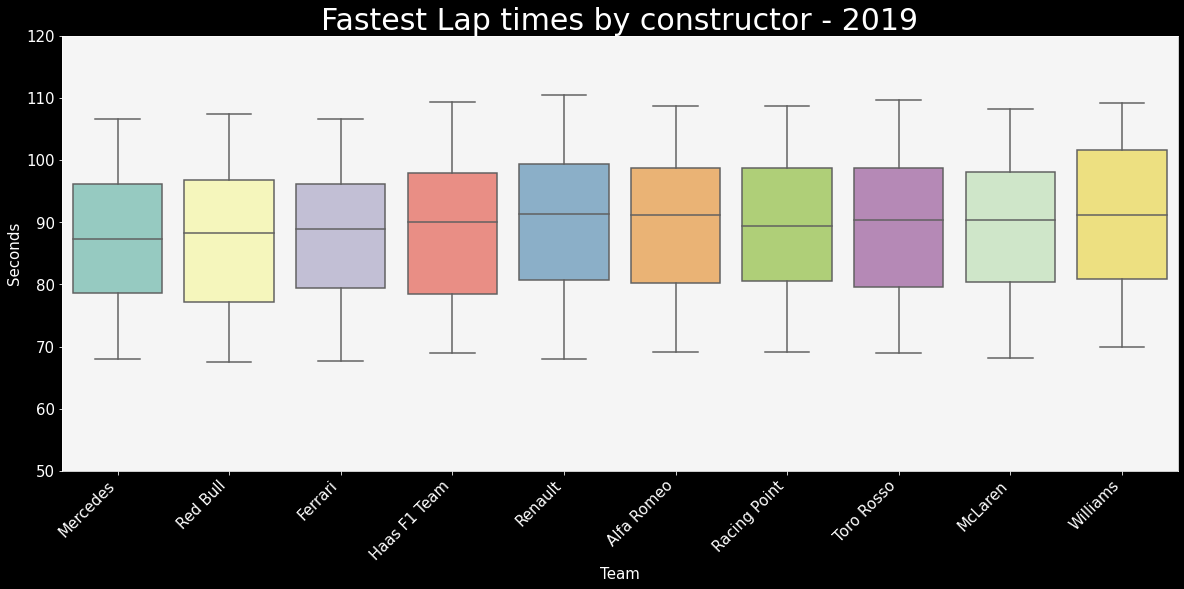

In [96]:
plt.style.use('dark_background')
fig, axs = plt.subplots(figsize=(20, 8))
axs.tick_params(axis="x", labelsize=15)
axs.tick_params(axis="y", labelsize=15)
axs.set_facecolor('whitesmoke')

sns.boxplot(x = 'name_y', y = 'fastestLapTime', data = r2019)
plt.ylim(50,120)
plt.title("Fastest Lap times by constructor - 2019",fontsize=30)
plt.xlabel('Team',fontsize = 15)
plt.ylabel('Seconds',fontsize = 15)
plt.xticks(rotation=45, ha='right')
plt.show()

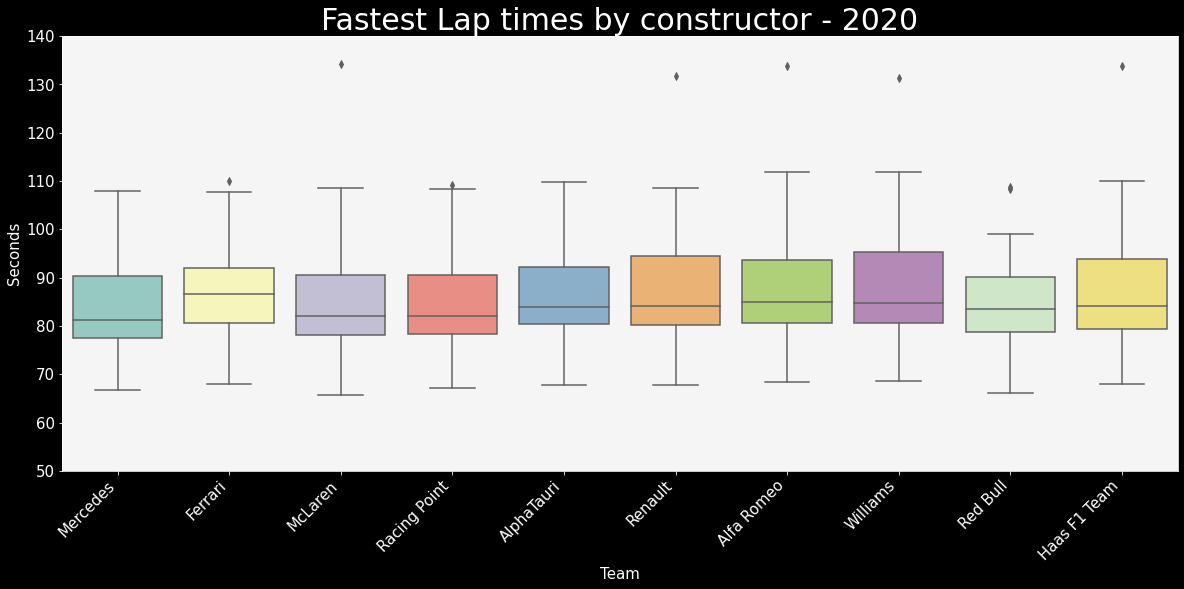

In [97]:
plt.style.use('dark_background')
fig, axs = plt.subplots(figsize=(20, 8))
axs.tick_params(axis="x", labelsize=15)
axs.tick_params(axis="y", labelsize=15)
axs.set_facecolor('whitesmoke')

sns.boxplot(x = 'name_y', y = 'fastestLapTime', data = r2020)
plt.ylim(50,140)
plt.title("Fastest Lap times by constructor - 2020",fontsize=30)
plt.xlabel('Team',fontsize = 15)
plt.ylabel('Seconds',fontsize = 15)
plt.xticks(rotation=45, ha='right')
plt.show()

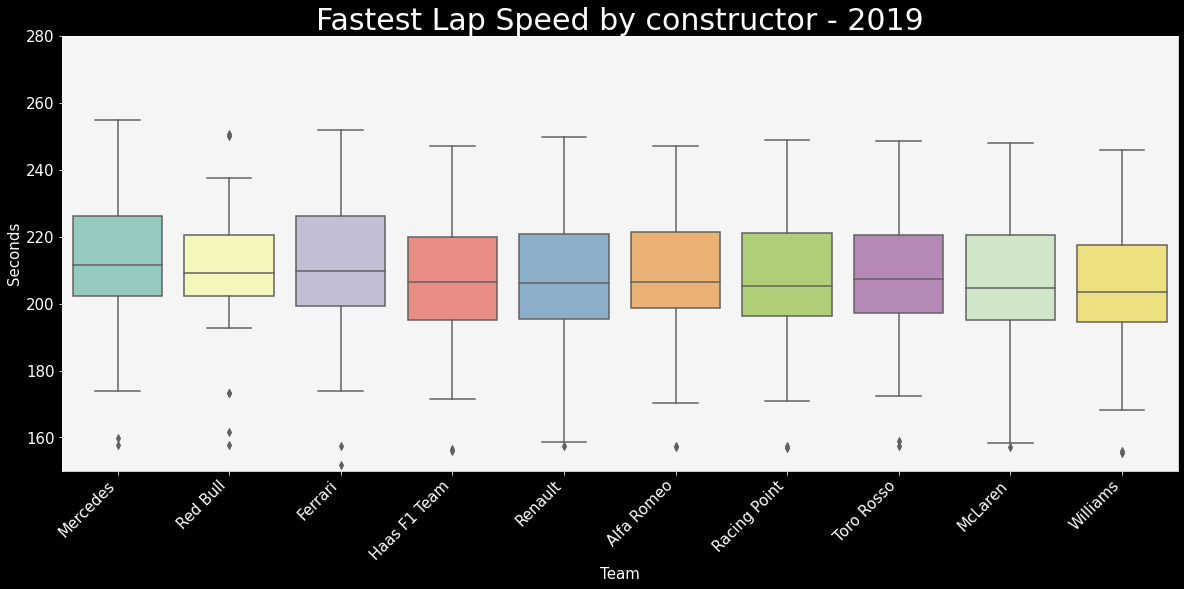

In [98]:
plt.style.use('dark_background')
fig, axs = plt.subplots(figsize=(20, 8))
axs.tick_params(axis="x", labelsize=15)
axs.tick_params(axis="y", labelsize=15)
axs.set_facecolor('whitesmoke')

sns.boxplot(x = 'name_y', y = 'fastestLapSpeed', data = r2019)
plt.ylim(150,280)
plt.title("Fastest Lap Speed by constructor - 2019",fontsize=30)
plt.xlabel('Team',fontsize = 15)
plt.ylabel('Seconds',fontsize = 15)
plt.xticks(rotation=45, ha='right')
plt.show()

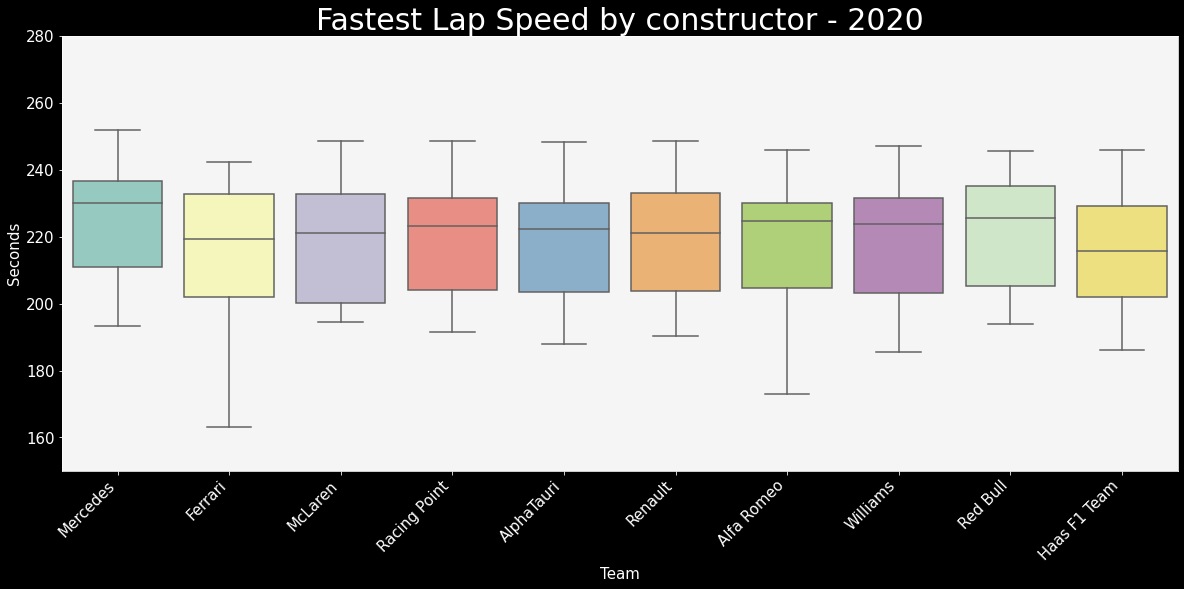

In [99]:
plt.style.use('dark_background')
fig, axs = plt.subplots(figsize=(20, 8))
axs.tick_params(axis="x", labelsize=15)
axs.tick_params(axis="y", labelsize=15)
axs.set_facecolor('whitesmoke')

sns.boxplot(x = 'name_y', y = 'fastestLapSpeed', data = r2020)
plt.ylim(150,280)
plt.title("Fastest Lap Speed by constructor - 2020",fontsize=30)
plt.xlabel('Team',fontsize = 15)
plt.ylabel('Seconds',fontsize = 15)
plt.xticks(rotation=45, ha='right')
plt.show()

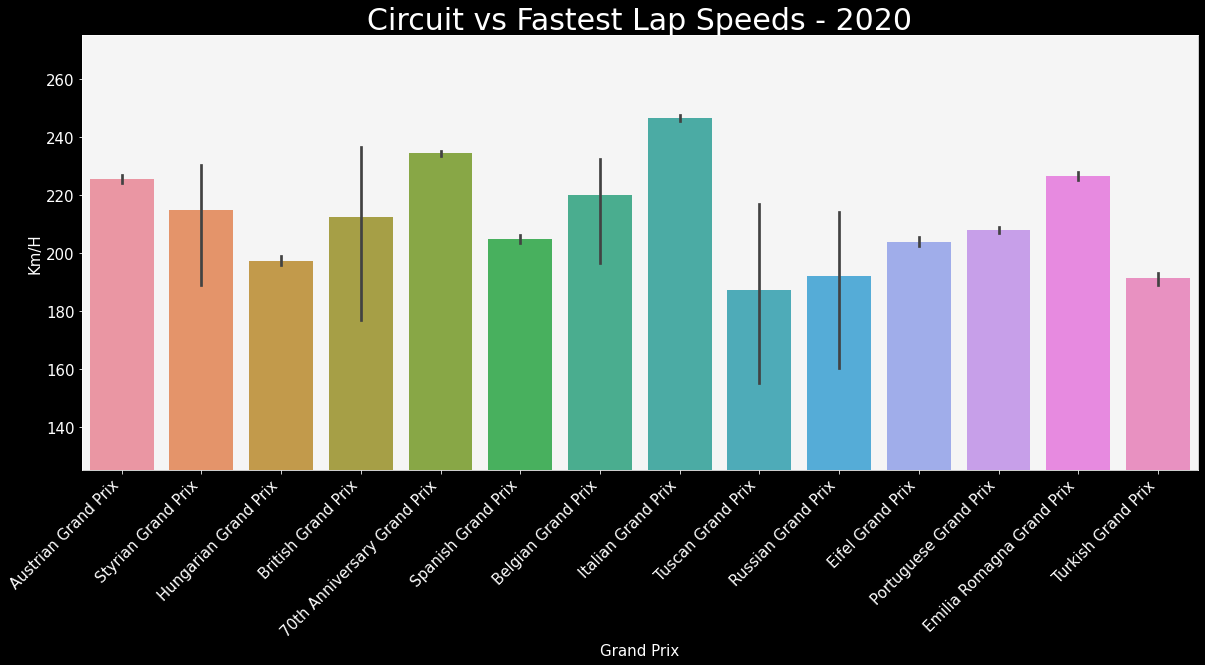

In [100]:
plt.style.use('dark_background')
fig, axs = plt.subplots(figsize=(20, 8))
axs.tick_params(axis="x", labelsize=15)
axs.tick_params(axis="y", labelsize=15)
axs.set_facecolor('whitesmoke')

sns.barplot(x = 'name_x', y = 'fastestLapSpeed', data = r2020)
plt.ylim(125,275)
plt.title("Circuit vs Fastest Lap Speeds - 2020",fontsize=30)
plt.xlabel('Grand Prix',fontsize = 15)
plt.ylabel('Km/H',fontsize = 15)
plt.xticks(rotation=45, ha='right')
plt.show()

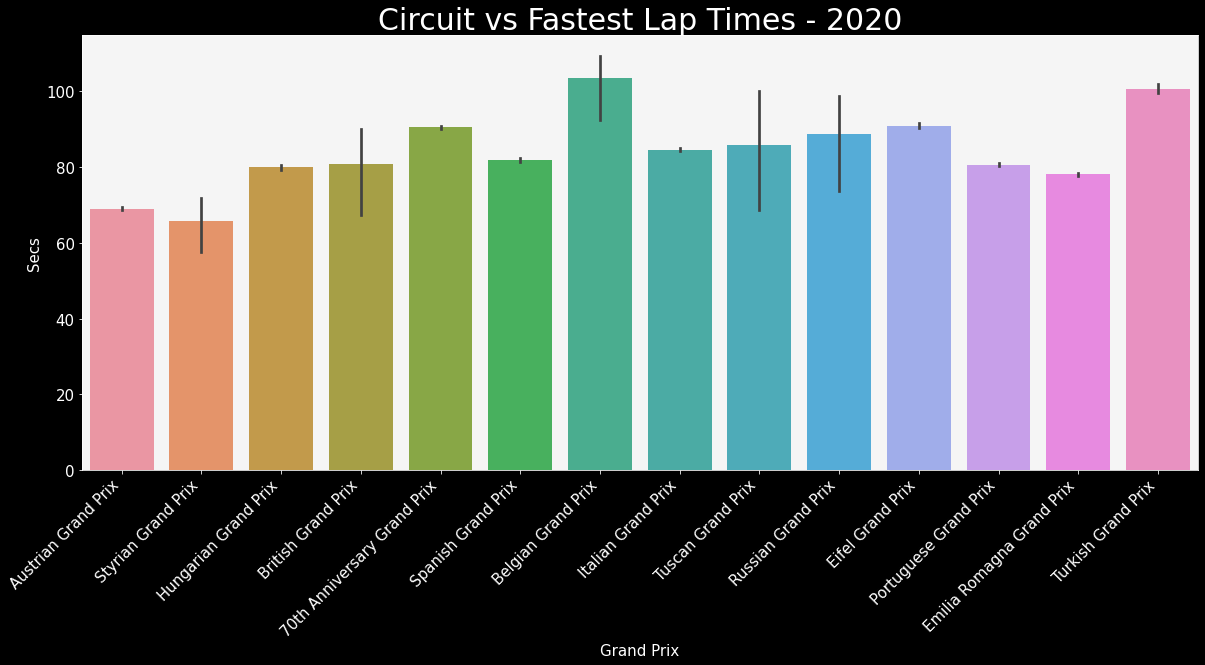

In [101]:
plt.style.use('dark_background')
fig, axs = plt.subplots(figsize=(20, 8))
axs.tick_params(axis="x", labelsize=15)
axs.tick_params(axis="y", labelsize=15)
axs.set_facecolor('whitesmoke')

sns.barplot(x = 'name_x', y = 'fastestLapTime', data = r2020)
# plt.ylim(125,275)
plt.title("Circuit vs Fastest Lap Times - 2020",fontsize=30)
plt.xlabel('Grand Prix',fontsize = 15)
plt.ylabel('Secs',fontsize = 15)
plt.xticks(rotation=45, ha='right')
plt.show()